**Auteur** : Voahangy Joan Aléonard<br>
**Date dernière version** : 27/10/2020<br>
**Librairies utilisées** : Pandas, Numpy, Matplotlib, Seaborn, Collections, Missingno<br>

---


# <center><font color=red>Open Food Facts : Découverte et nettoyage du jeu de données</font></center>

**Open Food Facts** est une base de données sur les produits alimentaires, faite par des contributeurs partout dans le monde pour tout le monde.

L'objectif de ce notebook est de **nettoyer les données** afin de le préparer pour une exploration approfondie.

# <center><font color=green>Etape 1 - Inspection générale des données</font></center>

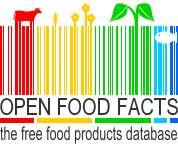

## <font color=blue>1.1 - Importation des librairies et chargement du Dataset</font>
Nous appelerons ce dataset : <code>**original**</code>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython.display import clear_output

# Install a library
!pip install missingno
clear_output()

In [3]:
# -*- coding: uft-8 -*-

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import missingno as msno

plt.rcParams["axes.facecolor"] = "#f9f9f9"
sns.set_style("white")
%matplotlib inline 

from pathlib import Path
src_path = Path("/content/drive/MyDrive/OC_IA/P03")

# Load dataset (.csv)
original = pd.read_csv(src_path / "fr.openfoodfacts.org.products.csv", 
                       sep="\t", 
                       encoding="utf-8", 
                       low_memory=False)

# Display shape
print("Dimensions : ", original.shape)

Dimensions :  (320772, 162)


## <font color=blue>1.2 - Synthèse</font>
### <font color=brown>1.2.1 - Les 5 premières lignes</font>

In [4]:
# Configuration de l'affichage pour visualiser l'intégralité des colonnes
pd.options.display.max_columns = original.shape[1]

# Affichage des 5 premières lignes
original.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

Le dataset affiche un **nombre conséquent de variables, avec des valeurs NaN toutes aussi conséquentes**.

Affichons le taux de remplissage des colonnes pour en savoir plus.

### <font color=brown>1.2.2 - Taux de complétude des données</font>

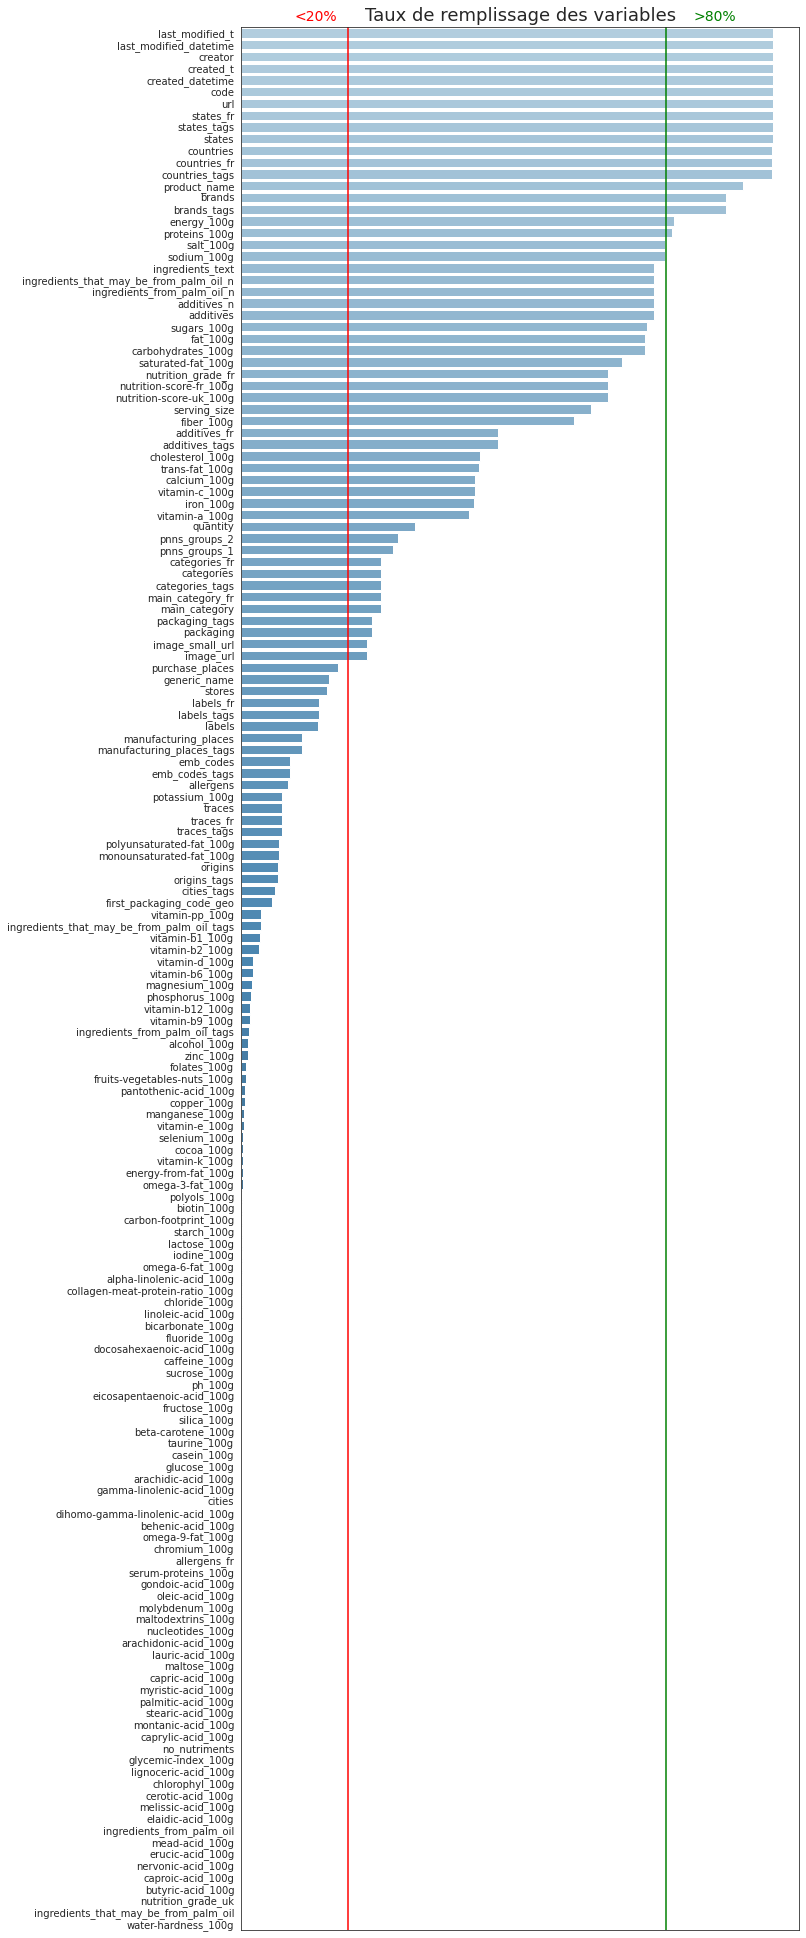

In [5]:
# Calcul du taux de remplissage des colonnes
taux = pd.DataFrame(
    original.count()/original.shape[0]*100,
    columns=["Taux de remplissage"]).sort_values("Taux de remplissage", 
                                                 ascending=False).reset_index()

# Plot
fig, axs = plt.subplots(figsize=(10,35))
sns.barplot(y=taux["index"], x="Taux de remplissage", 
            data=taux, palette="Blues_d")# Permuter x et y change le sens du graph
plt.title("Taux de remplissage des variables", fontsize=18)
plt.xlabel("")
plt.ylabel("")
axs.axes.xaxis.set_visible(False)
plt.axvline(x=80, color='g')
plt.text(85, -1, '>80%', color='g', fontsize=14)
plt.axvline(x=20, color='r')
plt.text(10, -1, '<20%', color='r', fontsize=14)
plt.show()

### <font color=brown>1.2.3 - Paragraphe de synthèse</font>

In [6]:
# Synthèse du dataset :

# Shape
print("Le DataFrame original a " + str(original.shape[0]) 
      + " lignes et " + str(original.shape[1]) + " colonnes.\n")

# Valeurs manquantes
nb_lignes, nb_cols = original.shape
nb_manquants = original.isnull().sum()
print ("Il y a " + str(nb_manquants[(nb_manquants != 0)].shape[0]) + " colonnes ayant des valeurs manquantes.")
cols_vides = ((nb_manquants / nb_lignes) >=0.8)
somme_cols_vides = cols_vides.sum()
message = (f"{somme_cols_vides} colonnes ont 80% de données manquantes.\n")
print(message)

# Affichage des types de variables du DataFrame
print("Les types de données :\n",original.dtypes.value_counts())

Le DataFrame original a 320772 lignes et 162 colonnes.

Il y a 160 colonnes ayant des valeurs manquantes.
108 colonnes ont 80% de données manquantes.

Les types de données :
 float64    106
object      56
dtype: int64


**<center>Tableau de synthèse</center>**

| **Indicateurs** | **Valeurs** |
| :--- | :---: |
| **Nombre de colonnes** | 162 |
| **Nombre de lignes** | 320.772 |
| **Nombre de variables qualitatives** | 56 |
| **Nombre de variables quantitatives** | 106 |
| **Données manquantes** | 108 colonnes ont plus de 80% de données manquantes |

<br>

**On a beaucoup de variables mais également beaucoup de données manquantes.**

Concentrons-nous sur les objectifs définis par **Santé publique France** afin d'exploiter au maximum ce dataset.


------------------------------------------------------------------------------------------------------------------------

# <center><font color=green>Etape 2 - Sélection des variables d'intérêts</font></center>

Pour rappel, cet appel à projet est mandaté par l'agence **Santé publique France**.

**Santé publique France** est un établissement public administratif, sous tutelle du Ministère chargé de la Santé, et ayant pour mission d'**améliorer et de protéger la santé de la population française**. 

Notre **objectif principal** est de proposer aux agents de Santé publique France une analyse de ce dataset leur permettant de tirer des conclusions sur les **axes possibles d'amélioration la santé de la population française au travers de leur alimentation**.

Mais avant de pouvoir commencer une analyse, il est nécessaire de vérifier que les données à notre disposition sont des données à valeur ajoutée et surtout ne contenant pas d'information erronée ou inutile.

Ce notebook a donc pour objectif de **nettoyer le jeu de données**. Un 2<sup>e</sup> notebook se concentrera sur l'exploration des données nettoyées de ses incohérences.

Pour **Santé publique France**, nous allons nous concentrer sur : 
- <font color=blue>**Les produits vendus en France** ;
- **Toute information permettant de qualifier les produits** ;
- **Tout indicateur apportant une vue sur la qualité nutritionnelle ou l'absence de qualité nutritionnelle des produits**.</font>

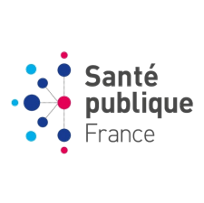

## **<font color=blue>2.1 - Zoom sur les produits vendus en France</font>**
### **<font color=brown>2.1.1 - Analyse des variables sur les pays**

Nous avons 3 variables disponibles : <code>**countries, countries_tags, countries_fr**</code>

Nous appellerons le DataFrame des produits vendus en France :<code>**df_fr**</code>.

In [7]:
# Fonction pour comparer différentes variables qui semblent similaires
"""
Cette fonction permet d'afficher le % de complétude des données, le nombre de lignes renseignées,
et le nombre de produits uniques pour une liste de variables à comparer
Arguments :
Résultats : 
"""
def comparaison_variables(dff, liste_fournie):
    for i in liste_fournie:
        print("Le % de complétude de [" + str(i) + "] est de "\
              + str(round(100 * dff[i].count() / len(dff), 1)) + " % soit : "
              + str(dff[i].value_counts().sum()) + " de lignes et "
              + str(dff[i].nunique()) + " valeurs uniques.")

# Liste de variables à comparer
liste_pays = ["countries", "countries_tags", "countries_fr"]

# Appel de la fonction de comparaison
comparaison_variables(original, liste_pays)

Le % de complétude de [countries] est de 99.9 % soit : 320492 de lignes et 1434 valeurs uniques.
Le % de complétude de [countries_tags] est de 99.9 % soit : 320492 de lignes et 725 valeurs uniques.
Le % de complétude de [countries_fr] est de 99.9 % soit : 320492 de lignes et 722 valeurs uniques.


<code>**countries_tags**</code> et <code>**countries_fr**</code> semblent plus "réalistes" avec environ ~720 valeurs pour les pays, contre 1434 pour <code>countries</code>.

La base de données d'Open Food Facts étant un projet français, on peut espérer le **champ pays en français soit plus ou moins standardisé**. 

Analysons <code>**countries_fr**</code>, en splittant les valeurs de chaque ligne pour avoir un décompte des pays.

In [8]:
# Fonction qui splitte les valeurs d'une ligne en faisant ensuite le comptage des valeurs uniques
""" 
Arguments : Dataframe, l'index de la colonne à analyser, 
nouveau nom attribué à la variable, nombre de ligne à afficher
"""
def table_split_count(dff, var, colonne_a_creer, nb):
    filtre = dff[var].dropna().astype(str).str.split(",")
    comptage = filtre.apply(lambda cpte: Counter(cpte)).sum()
    tri_comptage = sorted(comptage.items(), key=lambda c: c[1], reverse=True)
    tri_comptage = pd.DataFrame(tri_comptage, columns=[colonne_a_creer, "Pourcentage"])
    tri_comptage.set_index(keys=colonne_a_creer, inplace=True)
    tri_comptage = round(tri_comptage / dff.shape[0] *100,1)
    tri_comptage["% cumulé"] = round(tri_comptage["Pourcentage"].cumsum(),1)
    return tri_comptage.head(nb)

# Appel de la fonction
split_pays = table_split_count(original, "countries_fr", "Pays", 10)
split_pays

,Pourcentage,% cumulé
Pays,,
États-Unis,54.1,54.1
France,30.7,84.8
Suisse,5.3,90.1
Allemagne,2.7,92.8
Royaume-Uni,1.8,94.6
Espagne,1.7,96.3
Belgique,1.1,97.4
Australie,0.7,98.1
Italie,0.4,98.5


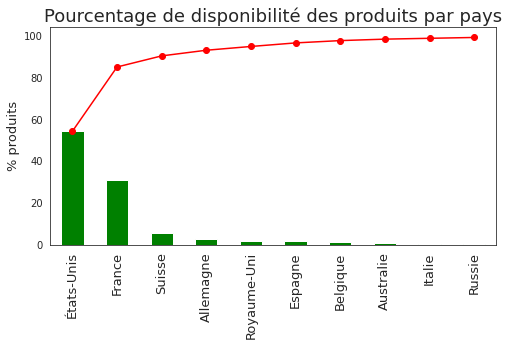

In [9]:
# Représentation graphique
fig, axs = plt.subplots(figsize=(8,4))
split_pays.plot.bar(y="Pourcentage", color="g", ax=axs, legend=None)
plt.plot(split_pays["% cumulé"], c="r", marker="o")
axs.set_title("Pourcentage de disponibilité des produits par pays", fontsize=18)
axs.set_xlabel("")
axs.set_ylabel("% produits", fontsize=13)
plt.xticks(fontsize=13)
plt.show()

Nous appliquons un **filtre France** sur <code>**countries_fr**</code> en créant notre nouveau Dataframe <code>**df_fr**</code>.

**NOTE** : Après plusieurs itérations, quelques données des DROM-COM ont été rajoutées (Guadeloupe, La Réunion, etc...).

In [10]:
# Application du filtre "France" sur le champ "countries_fr"
original["countries_fr"] = original["countries_fr"].str.replace("La Réunion|Guadeloupe|Frankreich|en:Frankrijk|Frankrijk|Mayotte|Guyane|Saint-Martin|Martinique|Saint-Pierre-et-Miquelon|Polynésie française|es:Franciaorszag|Puyricard", "France")
df_fr = original[original["countries_fr"].str.contains("France") == True].copy()

# Affichage de la dimension du DataFrame
print("Le DataFrame FRANCE a " + str(df_fr.shape[0]) 
      + " lignes et " + str(df_fr.shape[1]) + " colonnes.\n")

Le DataFrame FRANCE a 98958 lignes et 162 colonnes.



### **<font color=brown>2.1.2 - Suppression des variables de qualité médiocre</font>**
Nous avons déjà constaté que le dataset original contient un volume important de colonnes avec des valeurs manquantes.

Nous allons retirer toutes les colonnes de notre dataset **France** qui affichent un **pourcentage de données manquantes supérieur ou égal à 80%** puisqu'elles nous seront difficilement exploitables pour la suite de notre analyse.

In [11]:
# Suppression des colonnes avec 80% de valeurs manquantes
seuil = 0.8
df_fr = df_fr.loc[:, df_fr.isnull().mean() <= seuil]

# Affichage de la dimension du DataFrame
print("Le DataFrame FRANCE a " + str(df_fr.shape[0]) 
      + " lignes et " + str(df_fr.shape[1]) + " colonnes.\n")

Le DataFrame FRANCE a 98958 lignes et 60 colonnes.



### **<font color=brown>2.1.3 - Suppression des doublons</font></center>**

Nous allons **évaluer plusieurs subsets** pour déterminer lesquels sont les plus pertinents **pour la suppression de doublons**.

In [12]:
# Fonction pour trouver les colonnes pertinentes dans la recherche de doublons
test_doublons = [["code"], ["product_name"], ["code", "product_name"], ["product_name", "brands"]]

def verif_doublons(*col):
    for col in test_doublons:
        print(
            "Il y a {0} doublons (en lignes) dans \ les colonnes {1}.".format(df_fr.duplicated
                                                                              (col).sum(), col))

verif_doublons(test_doublons)

Il y a 0 doublons (en lignes) dans \ les colonnes ['code'].
Il y a 24268 doublons (en lignes) dans \ les colonnes ['product_name'].
Il y a 0 doublons (en lignes) dans \ les colonnes ['code', 'product_name'].
Il y a 10467 doublons (en lignes) dans \ les colonnes ['product_name', 'brands'].


Après ce test, nous observons que :
- <code>**code**</code> tout seul, ou en combinaison avec <code>**product_name**</code> ne retourne aucun doublon ;
- <code>**product_name**</code> tout seul retourne ~24k doublons, et en combinaison avec <code>**brands**</code>, 10k doublons.

Dans la mesure où plusieurs produits peuvent porter le même nom (ex: 6 oeufs bio), nous prennons le subset <code>**["product_name", "brands"]**</code> pour la suppression des doublons.

In [13]:
# Elimination des doublons en utilisant l'argument 'subset'
df_fr.drop_duplicates(subset=["product_name", "brands"], inplace=True)

# Affichage de la dimension du DataFrame
print("Le DataFrame FRANCE a " + str(df_fr.shape[0]) 
      + " lignes et " + str(df_fr.shape[1]) + " colonnes.\n")

Le DataFrame FRANCE a 88491 lignes et 60 colonnes.



### **<font color=brown>2.1.4 - Suppression des produits sans nom</font>**
Nous supprimons ces produits car s'ils ne sont pas identifiables, ils sont inexploitables.

In [14]:
# Affichage du nombre de produits sans nom
df_fr[df_fr["product_name"].isnull()][["code", "product_name", "brands"]]

,code,product_name,brands
48,0000000027205,NaN,NaN
183,0000007020254,NaN,A&W
511,00023375,NaN,M&S
10401,0012218000086,NaN,Carrefour
11810,0015100000324,NaN,"Creamette, Nwpc"
...,...,...,...
317211,8855263001842,NaN,DoiTung
317311,8858945530036,NaN,Chao sua
317527,8904004405422,NaN,Haldiram's
317984,9002515600653,NaN,Pago


In [15]:
# Suppression des lignes où le nom du produit est manquant
df_fr.dropna(axis=0, how="any", subset=["product_name"], inplace=True)

# Affichage de la taille du DataFrame
print("Le DataFrame a " + str(df_fr.shape[0]) + " lignes.")

Le DataFrame a 88013 lignes.


Représentons graphiquement les variables et leur complétude.

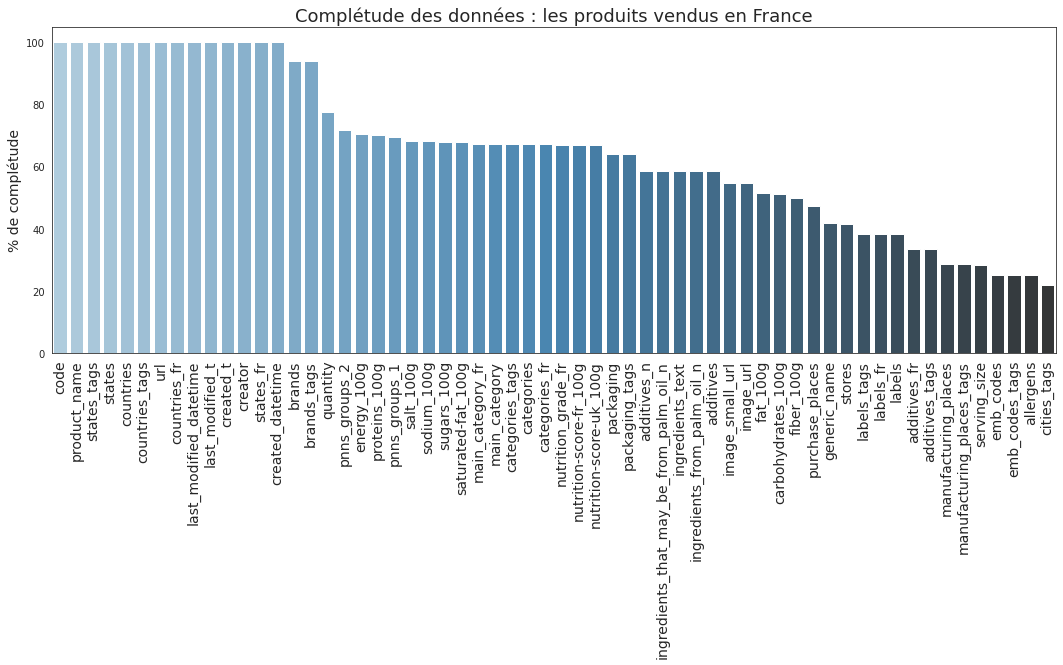

In [16]:
# Fonction représentant graphiquement le % de complétude des variables du DataFrame
"""
Cette fonction permet d'afficher un graphique en barres avec pour abscisses la liste des variables
et pour ordonnées le pourcentage de valeurs renseignées par variable
Arguments : dataframe, titre du graphique
Résultat : Diagramme en bar avec le % de complétude des données
"""
def graphique_completude_donnees(dff, titre):
    val_renseigne_pour100 = pd.DataFrame(dff.count() / dff.shape[0] * 100,
                                         columns=["% de complétude"]
                                        ).sort_values("% de complétude", 
                                                      ascending=False).reset_index()
    
    fig, axs = plt.subplots(figsize=(18, 6))
    plt.rcParams["xtick.bottom"] = plt.rcParams["xtick.labelbottom"] = True
    plt.rcParams["xtick.top"] = plt.rcParams["xtick.labeltop"] = False
    graph = sns.barplot(y="% de complétude", 
                x=val_renseigne_pour100["index"], 
                data=val_renseigne_pour100, 
                palette="Blues_d")
    plt.title(titre, fontsize=18)
    plt.xlabel("")
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("% de complétude", fontsize=14)
    plt.show()

# Appel de la fonction
titre = ("Complétude des données : les produits vendus en France")

graphique_completude_donnees(df_fr, titre)

In [17]:
# Création d'une fonction de paragraphe de synthèse
def synthese_generale(dff, seuil):
    # Affichage de la dimension
    print("Le DataFrame a " + str(dff.shape[0]) + " lignes et " + str(dff.shape[1]) + " colonnes,")
    print("soit " + str(round((len(dff) / len(original) * 100))) + "% des données du DataFrame original.\n")
    # Valeurs manquantes
    nb_lignes, nb_cols = dff.shape
    nb_manquants = dff.isnull().sum()
    print ("Il y a " + str(nb_manquants[(nb_manquants != 0)].shape[0]) + " colonnes ayant des valeurs manquantes,")
    cols_vides = ((nb_manquants / nb_lignes) >= seuil)
    somme_cols_vides = cols_vides.sum()
    message = (f"dont {somme_cols_vides} colonnes avec {seuil * 100:0.0f}% de données manquantes.\n")
    print(message)
    
    # Affichage des types de variables du DataFrame
    print("Les types de données :\n",dff.dtypes.value_counts())
    
# Appel de la fonction
synthese_generale(df_fr, 0.5)

Le DataFrame a 88013 lignes et 60 colonnes,
soit 27% des données du DataFrame original.

Il y a 47 colonnes ayant des valeurs manquantes,
dont 16 colonnes avec 50% de données manquantes.

Les types de données :
 object     46
float64    14
dtype: int64


**<center>Tableau de synthèse</center>**
<center>(en gras les données qui ont changées)</center>

| Indicateurs | Valeurs |
| :--- | :--- |
| Nb de lignes | **88.013** |
| % vs Original | **27%** |
| Nb de colonnes | **60** |
| Nb données qualitatives | **46** |
| Nb données quantitatives | **14** |
| Données manquantes | **47 colonnes** |

## **<font color=blue>2.2 - Identification / Qualification des produits</font>**

Nous sélectionnant **les variables qui améliorent notre connaissance des produits** et que nous considérons comme pertinentes pour **Santé publique France**.

### **<font color=brown>2.2.1 - Les marques</font>**
Cette connaissance est importante dans la mesure où nous pourrions par exemple évaluer - pour une catégorie de produit donnée, si une marque prend plus soin qu'une autre de modérer la quantité de sucre ou de sel présente dans son produit.

In [18]:
# Liste des variables à comparer
liste_marques = ["brands", "brands_tags"]

# Appel de la fonction de comparaison des variables
comparaison_variables(df_fr, liste_marques)

Le % de complétude de [brands] est de 93.9 % soit : 82664 de lignes et 21035 valeurs uniques.
Le % de complétude de [brands_tags] est de 93.9 % soit : 82660 de lignes et 16207 valeurs uniques.


In [19]:
# Fonction de représentation de la distribution empirique d'une variable
def distribution_empirique(dff, var, nb):
    variable = var
    effectifs = variable.value_counts()[:nb].sort_values(ascending=False)
    frequence = round(effectifs / len(variable) *100, 1).astype(str) + "%"
    freq_cumulee = round((effectifs / len(variable) *100).cumsum(skipna=True),1).astype(str) + "%"
    distribution = pd.DataFrame({"Effectif": effectifs, "Fréquence": frequence, "Fréquence cumulée": freq_cumulee})
    return distribution.head(nb)

# Appel de la fonction
for var in liste_marques:
    print("Pour {0}: \n".format(var))
    print(distribution_empirique(df_fr, df_fr[var],30))
    print(" \n")

Pour brands: 

                   Effectif Fréquence Fréquence cumulée
Carrefour              2658      3.0%              3.0%
Auchan                 2079      2.4%              5.4%
U                      1950      2.2%              7.6%
Leader Price           1592      1.8%              9.4%
Casino                 1465      1.7%             11.1%
Cora                    913      1.0%             12.1%
Picard                  837      1.0%             13.1%
Monoprix                695      0.8%             13.8%
Dia                     519      0.6%             14.4%
Fleury Michon           468      0.5%             15.0%
Franprix                412      0.5%             15.4%
Netto                   408      0.5%             15.9%
Nestlé                  394      0.4%             16.3%
La Vie Claire           317      0.4%             16.7%
Sans marque             300      0.3%             17.1%
Delhaize                260      0.3%             17.3%
Belle France            253      

Corrigeons quelques valeurs de <code>**brands**</code>.

In [20]:
# Formatage de la variable brands et suppression des redondances
df_fr["brands"] = df_fr["brands"].str.lower().str.capitalize()
df_fr.loc[df_fr["brands"].str.contains("Carrefour|carrefour", na=False),"brands"] = "Carrefour"
df_fr.loc[df_fr["brands"].str.contains("Auchan|auchan", na=False),"brands"] = "Auchan"
df_fr.loc[df_fr["brands"].str.contains("Marque Repère|Marque repère", na=False),"brands"] = "Leclerc"
df_fr.loc[df_fr["brands"].str.contains("leclerc|marque repère", na=False),"brands"] = "Leclerc"
df_fr.loc[df_fr["brands"].str.contains("Leader price|leader price", na=False),"brands"] = "Leader Price"
df_fr.loc[df_fr["brands"].str.contains("Casino|casino", na=False),"brands"] = "Casino"
df_fr.loc[df_fr["brands"].str.contains("Monoprix|monoprix", na=False),"brands"] = "Monoprix"
df_fr.loc[df_fr["brands"].str.contains("Naturalia|naturalia", na=False),"brands"] = "Naturalia"
df_fr.loc[df_fr["brands"].str.contains("U Bio|U bio|u bio|U tout petits", na=False),"brands"] = "U"
df_fr.loc[df_fr["brands"].str.contains("Intermarché|intermarché", na=False),"brands"] = "Intermarché"
df_fr.loc[df_fr["brands"].str.contains("Starbucks|starbucks", na=False),"brands"] = "Starbucks"
df_fr.loc[df_fr["brands"].str.contains("Herta|herta", na=False),"brands"] = "Herta"
df_fr.loc[df_fr["brands"].str.contains("Marks & spencer|marks & spencer|M&s", na=False),"brands"] = "Marks & Spencer"
df_fr.loc[df_fr["brands"].str.contains("Ferrero|ferrero|Nutella|Kinder", na=False),"brands"] = "Ferrero"
df_fr.loc[df_fr["brands"].str.contains("Babybio|babybio", na=False),"brands"] = "Babybio"
df_fr.loc[df_fr["brands"].str.contains("HiPP|Hipp", na=False),"brands"] = "HiPP"
df_fr.loc[df_fr["brands"].str.contains("La Vie Claire|La vie claire", na=False),"brands"] = "La Vie Claire"
df_fr.loc[df_fr["brands"].str.contains("Vrai", na=False),"brands"] = "Vrai"
df_fr.loc[df_fr["brands"].str.contains("Chabrior", na=False),"brands"] = "Chabrior"
df_fr.loc[df_fr["brands"].str.contains("Fiorini", na=False),"brands"] = "Fiorini"
df_fr.loc[df_fr["brands"].str.contains("Fleury michon|fleury michon", na=False),"brands"] = "Fleury Michon"
df_fr.loc[df_fr["brands"].str.contains("Jardin bio|jardin bio", na=False),"brands"] = "Jardin bio"
df_fr.loc[df_fr["brands"].str.contains("Céréal bio", na=False),"brands"] = "Céréal Bio"
df_fr.loc[df_fr["brands"].str.contains("Bonneterre", na=False),"brands"] = "Bonneterre"
df_fr.loc[df_fr["brands"].str.contains("Biocoop|biocoop", na=False),"brands"] = "Biocoop"
df_fr.loc[df_fr["brands"].str.contains("Bjorg", na=False),"brands"] = "Bjorg"
df_fr.loc[df_fr["brands"].str.contains("Priméal", na=False),"brands"] = "Priméal"
df_fr.loc[df_fr["brands"].str.contains("Liebig", na=False),"brands"] = "Liebig"
df_fr.loc[df_fr["brands"].str.contains("Knorr", na=False),"brands"] = "Knorr"
df_fr.loc[df_fr["brands"].str.contains("Blédina", na=False),"brands"] = "Blédina"
df_fr.loc[df_fr["brands"].str.contains("Nestlé|nestlé", na=False),"brands"] = "Nestlé"
df_fr.loc[df_fr["brands"].str.contains("Panzani", na=False),"brands"] = "Panzani"
df_fr.loc[df_fr["brands"].str.contains("Barilla", na=False),"brands"] = "Barilla"
df_fr.loc[df_fr["brands"].str.contains("Lu,mondelez|lu,mondelez", na=False),"brands"] = "Lu"
df_fr.loc[df_fr["brands"].str.contains("Milka,mondelez|Milka,kraft foods", na=False),"brands"] = "Milka"


distribution_empirique(df_fr, df_fr["brands"],30)

,Effectif,Fréquence,Fréquence cumulée
Carrefour,3907,4.4%,4.4%
Auchan,2776,3.2%,7.6%
Leclerc,2309,2.6%,10.2%
U,2267,2.6%,12.8%
Casino,2023,2.3%,15.1%
Leader Price,2005,2.3%,17.4%
Monoprix,1112,1.3%,18.6%
Cora,934,1.1%,19.7%
Nestlé,914,1.0%,20.7%
Picard,885,1.0%,21.7%


In [21]:
# Correction des marques a postériori si nécessaire
# df_scoring.loc[df_scoring["marques"].str.contains("Milka")]

Les valeurs de <code>**brands**</code> sont corrigées.

### **<font color=brown>2.2.2 - Les catégories et sous-catégories de produit</font>**
Nous avons pratiquement **7 variables assez similaires** pour détecter la catégorie des produits : <code>**categories, categories_tags, categories_fr, pnns_groups_1, pnns_groups_2, main_category, main_category_fr**</code>.

In [22]:
# Liste des variables à comparer
liste_categories = ["categories", "categories_tags", "categories_fr", "pnns_groups_1", "pnns_groups_2", 
                    "main_category", "main_category_fr"]

# Appel de la fonction de comparaison des variables
comparaison_variables(df_fr, liste_categories)

Le % de complétude de [categories] est de 67.2 % soit : 59115 de lignes et 26053 valeurs uniques.
Le % de complétude de [categories_tags] est de 67.2 % soit : 59115 de lignes et 15388 valeurs uniques.
Le % de complétude de [categories_fr] est de 67.2 % soit : 59115 de lignes et 15388 valeurs uniques.
Le % de complétude de [pnns_groups_1] est de 69.5 % soit : 61143 de lignes et 13 valeurs uniques.
Le % de complétude de [pnns_groups_2] est de 71.7 % soit : 63148 de lignes et 41 valeurs uniques.
Le % de complétude de [main_category] est de 67.2 % soit : 59115 de lignes et 1555 valeurs uniques.
Le % de complétude de [main_category_fr] est de 67.2 % soit : 59115 de lignes et 1555 valeurs uniques.


Les variables <code>**pnns_groups_1**</code> et <code>**pnns_groups_2**</code> ont le taux de remplissage le plus élevé, avec un nombre de **valeurs uniques** qui semble raisonnables, de respectivement **13** et **41** valeurs.

Analysons un peu plus en détail.

In [23]:
print(df_fr["pnns_groups_1"].value_counts(dropna=False))

NaN                        26870
unknown                    11061
Sugary snacks               9024
Fish Meat Eggs              6481
Milk and dairy products     6236
Beverages                   6158
Composite foods             5901
Cereals and potatoes        5868
Fruits and vegetables       3893
Fat and sauces              3527
Salty snacks                2006
fruits-and-vegetables        521
sugary-snacks                465
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64


In [24]:
print(df_fr["pnns_groups_2"].value_counts(dropna=False))

NaN                                 24865
unknown                             11061
One-dish meals                       4823
Biscuits and cakes                   3679
Sweets                               3232
Cheese                               2929
Cereals                              2925
Processed meat                       2752
Non-sugared beverages                2692
Dressings and sauces                 2423
Chocolate products                   2113
Fish and seafood                     2112
Milk and yogurt                      1991
Alcoholic beverages                  1943
Vegetables                           1678
Appetizers                           1546
Sweetened beverages                  1495
Fruit juices                         1467
Fruits                               1441
Meat                                 1302
Bread                                1280
Fats                                 1104
Breakfast cereals                    1054
Dairy desserts                    

Reformatons légèrement quelques libellés <code>**pnns_groups_1**</code> et <code>**pnns_groups_2**</code>, qui sont un peu dédoublés avec les majuscules/minuscules ou la présence de tirets.

In [25]:
# Variables catégorie et sous-catégorie
df_fr["pnns_groups_1"] = df_fr["pnns_groups_1"].str.replace("-"," ").str.upper().str.capitalize()
df_fr["pnns_groups_2"] = df_fr["pnns_groups_2"].str.upper().str.capitalize()

# Création d'un dictionnaire anglais-français
pnns_dict = {"Unknown":"Non spécifié", "Sugary snacks":"Snacks sucrés", 
              "Fish meat eggs":"Poissons Viandes Oeufs", "Beverages":"Boissons", 
              "Milk and dairy products":"Produits laitiers", "Cereals and potatoes":"Céréales et Patates", 
              "Composite foods":"Aliments composés", "Fruits and vegetables":"Fruits et légumes", 
              "Fat and sauces":"Matières grasses et sauces", "Salty snacks":"Snacks salés", 
              "One-dish meals":"Aliments préparés", 
              "Pizza pies and quiche":"Pizza Tartes Quiches", "Sandwich":"Sandwichs", 
              "Processed meat":"Charcuteries", "Tripe dishes":"Charcuteries", 
              "Fish and seafood":"Poissons-Fruits de mer", "Meat":"Viandes", "Eggs":"Oeufs", 
              "Biscuits and cakes":"Biscuits et gâteaux", "Sweets":"Confiserie", "Cereals":"Céréales", 
              "Chocolate products":"Chocolaterie", 
              "Breakfast cereals":"Petit-déjeuner", "Bread":"Boulangerie", "Pastries":"Pâtisserie", 
              "Cheese":"Fromage", "Milk and yogurt":"Lait et yaourt", "Dairy desserts":"Desserts lactés", 
              "Ice cream":"Glaces", "Non-sugared beverages":"Boissons non sucrées", 
              "Artificially sweetened beverages":"Boissons sucrées", 
              "Sweetened beverages":"Boissons sucrées", "Alcoholic beverages":"Boissons alcoolisées", 
              "Soups":"Soupes", "Fats":"Matières grasses", "Dressings and sauces":"Condiments et sauces", 
              "Appetizers":"Produits apéritifs", "Salty and fatty products":"Produits apéritifs", 
              "Nuts":"Fruits à coque", "Vegetables":"Légumes", "Legumes":"Légumineuses", 
              "Potatoes":"Patates", "Fruit juices":"Jus de fruits", "Dried fruits":"Fruits secs", 
              "Fruit nectars":"Nectar de fruits", "Fruits":"Fruits"}

# Fonction d'appel aux équivalences d'un dictionnaire
def trouve_equivalence(item):
    if item in pnns_dict.keys():
        return pnns_dict[item]
    return item

df_fr["pnns_groups_1"] = df_fr["pnns_groups_1"].apply(trouve_equivalence)
df_fr["pnns_groups_2"] = df_fr["pnns_groups_2"].apply(trouve_equivalence)

# Affichage des dimensions
print("Dimensions : ", df_fr.shape)

# Affichage des valeurs
print(df_fr["pnns_groups_1"].isnull().value_counts(dropna=False), "\n")
print(df_fr["pnns_groups_2"].isnull().value_counts(dropna=False), "\n")

Dimensions :  (88013, 60)
False    61143
True     26870
Name: pnns_groups_1, dtype: int64 

False    63148
True     24865
Name: pnns_groups_2, dtype: int64 



Nous pouvons essayer d'améliorer un tout petit peu la complétude de nos données sur les catégories / sous-catégories de produits en :
- complétant pnns1 avec regardant les données renseignées sur pnns2;
- complétant pnns1 et 2 en regardant les données disponibles sur <code>**main_category_fr**</code> lorsque c'est évident.

In [26]:
# Amélioration de la complétude des données pnns1 avec pnns2
df_fr.loc[((df_fr["pnns_groups_1"].isnull()) & (df_fr["pnns_groups_2"]=="Boissons alcoolisées")), 
          "pnns_groups_1"] = "Boissons"

df_fr.loc[((df_fr["pnns_groups_1"].isnull()) & (df_fr["pnns_groups_2"]=="Charcuteries")), 
          "pnns_groups_1"] = "Poissons Viandes Oeufs"

# Essai d'amélioration de la complétude des données pnns1 & 2 avec main categorie_fr
df_fr.loc[(((df_fr["pnns_groups_1"]=="Non spécifié") | (df_fr["pnns_groups_1"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Epices|Condiments", na=False))), 
          "pnns_groups_1"] = "Matières grasses et sauces"
df_fr.loc[(((df_fr["pnns_groups_2"]=="Non spécifié") | (df_fr["pnns_groups_2"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Epices|Condiments", na=False))), 
          "pnns_groups_2"] = "Condiments et sauces"

df_fr.loc[(((df_fr["pnns_groups_1"]=="Non spécifié")  | (df_fr["pnns_groups_1"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Snacks sucrés|Crêpes et galettes|Gaufres", na=False))), 
          "pnns_groups_1"] = "Snacks sucrés"
df_fr.loc[(((df_fr["pnns_groups_2"]=="Non spécifié")  | (df_fr["pnns_groups_2"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Snacks sucrés|Crêpes et galettes|Gaufres", na=False))), 
          "pnns_groups_2"] = "Biscuits et gâteaux"

df_fr.loc[(((df_fr["pnns_groups_1"]=="Non spécifié")  | (df_fr["pnns_groups_1"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Poissons et viandes et oeufs", na=False))), 
          "pnns_groups_1"] = "Poissons Viandes Oeufs"
df_fr.loc[(((df_fr["pnns_groups_2"]=="Non spécifié")  | (df_fr["pnns_groups_2"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Poissons et viandes et oeufs", na=False))), 
          "pnns_groups_2"] = "Viandes"

df_fr.loc[(((df_fr["pnns_groups_1"]=="Non spécifié")  | (df_fr["pnns_groups_1"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Aliments pour bébé", na=False))), 
          "pnns_groups_1"] = "Aliments composés"
df_fr.loc[(((df_fr["pnns_groups_2"]=="Non spécifié")  | (df_fr["pnns_groups_2"].isnull())) 
           & (df_fr["main_category_fr"].str.contains("Aliments pour bébé", na=False))), 
          "pnns_groups_2"] = "Aliments pour bébé"

# Vérification des valeurs renseignées pour les 2 variables
df_fr["pnns_groups_1"] = df_fr["pnns_groups_1"].replace("Non spécifié", np.NaN)
print(df_fr["pnns_groups_1"].isnull().value_counts(), "\n")
df_fr["pnns_groups_2"] = df_fr["pnns_groups_2"].replace("Non spécifié", np.NaN)
print(df_fr["pnns_groups_2"].isnull().value_counts(), "\n")

# Affichage des dimensions
print("Dimensions : ", df_fr.shape)

False    54008
True     34005
Name: pnns_groups_1, dtype: int64 

False    54008
True     34005
Name: pnns_groups_2, dtype: int64 

Dimensions :  (88013, 60)


Nous pourrions évidemment approfondir quant à la possibilité d'améliorer la complétude de nos données pour PNNS1 et PNNS2, *en utilisant par exemple un algorithme de classification*, mais 1) ce n'est pas l'objet de ce projet et 2) mes connaissances en la matière sont trop faibles pour donner une modèle performant.

Nous nous arrêtons à ce stade dans notre transformation des données, mais surtout nous allons **supprimer les données manquantes** pour ces 2 variables car, bien que nous nous séparons d'une partie de nos données leur absence permet d'appliquer sereinement notre stratégie d'imputation des valeurs manquantes plus tard dans ce notebook.

In [27]:
df_fr.dropna(subset=["pnns_groups_1", "pnns_groups_2"], inplace=True)
# Affichage des dimensions
print("Dimensions : ", df_fr.shape)

Dimensions :  (54008, 60)


### **<font color=brown>2.2.3 - Les produits issus de (l'agri)culture biologique</font>**
Une façon de qualifier la qualité nutrionnelle d'un aliment serait potentiellement de savoir si les produits sont **bio** ou non : en effet, obtenir cette qualification est un gage d'absence d'engrais et de pesticides de synthèse (produits chimiques) car le produit est plus "naturel".

Les variables étudiées dans cette partie sont : <code>**labels, labels_tags, labels_fr**</code>.

In [28]:
# Liste des variables à comparer
liste_labels = ["labels", "labels_tags", "labels_fr"]

# Appel de la fonction de comparaison des variables
comparaison_variables(df_fr, liste_labels)

Le % de complétude de [labels] est de 52.0 % soit : 28103 de lignes et 12001 valeurs uniques.
Le % de complétude de [labels_tags] est de 52.1 % soit : 28138 de lignes et 8969 valeurs uniques.
Le % de complétude de [labels_fr] est de 52.1 % soit : 28138 de lignes et 8969 valeurs uniques.


Nous prendrons la variable <code>**labels_fr**</code>.

In [29]:
distribution_empirique(df_fr, df_fr["labels_fr"], 10)

,Effectif,Fréquence,Fréquence cumulée
"Bio,Bio européen,AB Agriculture Biologique",1950,3.6%,3.6%
Point Vert,1855,3.4%,7.0%
"Point Vert,Eco-emballages",793,1.5%,8.5%
"Bio,Bio européen,FR-BIO-01,AB Agriculture Biologique",631,1.2%,9.7%
AOP,401,0.7%,10.4%
"Labels de distributeurs,Sélection Intermarché",368,0.7%,11.1%
Produit en Bretagne,343,0.6%,11.7%
"Sans colorants,Sans conservateurs",322,0.6%,12.3%
Sans conservateurs,293,0.5%,12.9%
"Viande Française,Viande Porcine Française",250,0.5%,13.3%


Nous allons créer une **nouvelle variable pour tagguer les produits bio**.

In [30]:
# Création d'une nouvelle variable pour tagguer les produits bio
df_fr["produit_bio"] = np.where(((df_fr["labels_fr"].str.contains("bio", case=False, na=False)==True) | 
                                 (df_fr["labels_fr"].str.contains("AB|Agriculture Biologique", na=False)==True) |
                                 (df_fr["labels_fr"].str.contains("Organic", na=False)==True)), 
                                "Bio", "Non spécifié")

df_fr.loc[((df_fr["product_name"].str.contains("Bio|bio", na=False)) & 
           (df_fr["labels"].isnull())), "produit_bio"] = "Bio"

# Vérification du nombre de produits avec le label "BIO"
df_fr["produit_bio"].value_counts()

Non spécifié    46755
Bio              7253
Name: produit_bio, dtype: int64

## **<font color=blue>2.3 - Composition des produits</font>**

Pour définir ce qu'est une alimentation de qualité, il faut également savoir la composition des aliments.

### **<font color=brown>2.3.1 - La présence d'additifs</font>**
Les variables étudiées dans cette partie sont : <code>**additives_n, additives, additives_tags, additives_fr**</code>.

In [31]:
# Liste des variables à comparer
liste_additifs = ["additives_n", "additives", "additives_tags", "additives_fr"]

# Appel de la fonction de comparaison des variables
comparaison_variables(df_fr, liste_additifs)

Le % de complétude de [additives_n] est de 85.2 % soit : 46018 de lignes et 26 valeurs uniques.
Le % de complétude de [additives] est de 85.2 % soit : 46010 de lignes et 39445 valeurs uniques.
Le % de complétude de [additives_tags] est de 48.3 % soit : 26108 de lignes et 10165 valeurs uniques.
Le % de complétude de [additives_fr] est de 48.3 % soit : 26108 de lignes et 10165 valeurs uniques.


In [32]:
distribution_empirique(df_fr, df_fr["additives_n"], 10)

,Effectif,Fréquence,Fréquence cumulée
0.0,19910,36.9%,36.9%
1.0,7832,14.5%,51.4%
2.0,5357,9.9%,61.3%
3.0,3874,7.2%,68.5%
4.0,2706,5.0%,73.5%
5.0,2011,3.7%,77.2%
6.0,1375,2.5%,79.7%
7.0,959,1.8%,81.5%
8.0,665,1.2%,82.7%
9.0,438,0.8%,83.6%


In [33]:
distribution_empirique(df_fr, df_fr["additives"], 10)

,Effectif,Fréquence,Fréquence cumulée
[ semoule-de-ble-dur-de-qualite-superieure -> fr:semoule-de-ble-dur-de-qualite-superieure ] [ semoule-de-ble-dur-de-qualite -> fr:semoule-de-ble-dur-de-qualite ] [ semoule-de-ble-dur-de -> fr:semoule-de-ble-dur-de ] [ semoule-de-ble-dur -> fr:semoule-de-ble-dur ] [ semoule-de-ble -> fr:semoule-de-ble ] [ semoule-de -> fr:semoule-de ] [ semoule -> fr:semoule ],182,0.3%,0.3%
[ 100-semoule-de-ble-dur-de-qualite-superieure -> fr:100-semoule-de-ble-dur-de-qualite-superieure ] [ 100-semoule-de-ble-dur-de-qualite -> fr:100-semoule-de-ble-dur-de-qualite ] [ 100-semoule-de-ble-dur-de -> fr:100-semoule-de-ble-dur-de ] [ 100-semoule-de-ble-dur -> fr:100-semoule-de-ble-dur ] [ 100-semoule-de-ble -> fr:100-semoule-de-ble ] [ 100-semoule-de -> fr:100-semoule-de ] [ 100-semoule -> fr:100-semoule ] [ 100 -> fr:100 ],137,0.3%,0.6%
[ jus-d-orange -> fr:jus-d-orange ] [ jus-d -> fr:jus-d ] [ jus -> fr:jus ],79,0.1%,0.7%
[ contient-des-sulfites -> fr:contient-des-sulfites ] [ contient-des -> fr:contient-des ] [ contient -> fr:contient ],77,0.1%,0.9%
[ semoule-de-ble-dur -> fr:semoule-de-ble-dur ] [ semoule-de-ble -> fr:semoule-de-ble ] [ semoule-de -> fr:semoule-de ] [ semoule -> fr:semoule ] [ eau -> fr:eau ],57,0.1%,1.0%
[ semoule-de-ble-dur -> fr:semoule-de-ble-dur ] [ semoule-de-ble -> fr:semoule-de-ble ] [ semoule-de -> fr:semoule-de ] [ semoule -> fr:semoule ],55,0.1%,1.1%
[ vin -> fr:vin ] [ sulfites -> fr:sulfites ],55,0.1%,1.2%
[ eau-minerale-naturelle -> fr:eau-minerale-naturelle ] [ eau-minerale -> fr:eau-minerale ] [ eau -> fr:eau ],51,0.1%,1.3%
[ haricots-verts -> fr:haricots-verts ] [ haricots -> fr:haricots ] [ eau -> fr:eau ] [ sel -> fr:sel ],50,0.1%,1.4%
[ cafe-moulu -> fr:cafe-moulu ] [ cafe -> fr:cafe ],47,0.1%,1.5%


In [34]:
distribution_empirique(df_fr, df_fr["additives_tags"], 10)

,Effectif,Fréquence,Fréquence cumulée
en:e322,1512,2.8%,2.8%
en:e300,1000,1.9%,4.7%
en:e330,943,1.7%,6.4%
en:e440,429,0.8%,7.2%
"en:e301,en:e250",336,0.6%,7.8%
en:e250,293,0.5%,8.4%
en:e14xx,283,0.5%,8.9%
"en:e330,en:e300",254,0.5%,9.4%
"en:e440,en:e330",247,0.5%,9.8%
en:e160c,231,0.4%,10.2%


In [35]:
distribution_empirique(df_fr, df_fr["additives_fr"], 10)

,Effectif,Fréquence,Fréquence cumulée
E322 - Lécithines,1512,2.8%,2.8%
E300 - Acide ascorbique,1000,1.9%,4.7%
E330 - Acide citrique,943,1.7%,6.4%
E440 - Pectines,429,0.8%,7.2%
"E301 - Ascorbate de sodium,E250 - Nitrite de sodium",336,0.6%,7.8%
E250 - Nitrite de sodium,293,0.5%,8.4%
E14XX - Amidons modifiés,283,0.5%,8.9%
"E330 - Acide citrique,E300 - Acide ascorbique",254,0.5%,9.4%
"E440 - Pectines,E330 - Acide citrique",247,0.5%,9.8%
E160c - Extrait de paprika,231,0.4%,10.2%


Nous observons que : 
- Les champs <code>**additives_tags**</code> et <code>**additives_fr**</code> sont équivalentes : nous garderons la variable <code>**additives_fr**</code> pour un usage aisé par les agents de Santé publique France, puisque les additifs sont nommés en français ;
- Le champ <code>**additives_n**</code> est très utile pour analyser le nombre d'additif dans les produits alimentaires proposés aux consommateurs.

In [36]:
# Vérification des valeurs existants
df_fr["additives_n"].value_counts(dropna=False)

0.0     19910
NaN      7990
1.0      7832
2.0      5357
3.0      3874
4.0      2706
5.0      2011
6.0      1375
7.0       959
8.0       665
9.0       438
10.0      269
11.0      193
12.0      139
13.0       91
14.0       81
15.0       50
16.0       31
17.0       13
18.0        8
19.0        6
20.0        4
21.0        2
31.0        1
26.0        1
22.0        1
23.0        1
Name: additives_n, dtype: int64

Nous garderons <code>**additives et additives_n**</code>.

### **<font color=brown>2.3.2 - La présence d'huile de palme</font>**
Les variables étudiées dans cette partie sont : <code>**ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n**</code>.

La présence d'huile de palme dans les aliments et les **potentiels risques cancérigènes** relevés par l'**Autorité européenne de sécurité des aliments** (AESA) depuis 2016 nous incitent à considérer ces variables comme dignes d'intérêt pour la santé humaine en général, y compris nutritionnelle.

Nous définissons ces 2 variables comme suit :
- la 1ère indiquant de **manière avérée la présence d'huile de palme** ;
- la 2e faisant mention de termes tels que "huile d'origine végétale" dans la liste des ingrédients pouvant révéler une **présence possible de l'huile de palme** dans le produit.

In [37]:
# Liste des variables à comparer
liste_palme = ["ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]

# Appel de la fonction de comparaison des variables
comparaison_variables(df_fr, liste_palme)

Le % de complétude de [ingredients_from_palm_oil_n] est de 85.2 % soit : 46018 de lignes et 3 valeurs uniques.
Le % de complétude de [ingredients_that_may_be_from_palm_oil_n] est de 85.2 % soit : 46018 de lignes et 6 valeurs uniques.


In [38]:
# Appel de la fonction de distribution numérique
for var in liste_palme:
    print("Pour {0}: \n".format(var))
    print(distribution_empirique(df_fr, df_fr[var],10))
    print(" \n")

Pour ingredients_from_palm_oil_n: 

     Effectif Fréquence Fréquence cumulée
0.0     42891     79.4%             79.4%
1.0      3079      5.7%             85.1%
2.0        48      0.1%             85.2%
 

Pour ingredients_that_may_be_from_palm_oil_n: 

     Effectif Fréquence Fréquence cumulée
0.0     40563     75.1%             75.1%
1.0      4251      7.9%             83.0%
2.0       934      1.7%             84.7%
3.0       233      0.4%             85.1%
4.0        32      0.1%             85.2%
5.0         5      0.0%             85.2%
 



In [39]:
# Tableau croisé entre les 2 variables
cross_var = pd.crosstab(index=df_fr["ingredients_from_palm_oil_n"], 
                  columns=df_fr["ingredients_that_may_be_from_palm_oil_n"], 
                  margins=True, margins_name="Total", normalize=True)
cross_var

ingredients_that_may_be_from_palm_oil_n,0.0,1.0,2.0,3.0,4.0,5.0,Total
ingredients_from_palm_oil_n,,,,,,,
0.0,0.835869,0.076144,0.015624,0.003933,0.000369,0.000109,0.932048
1.0,0.044917,0.016015,0.004542,0.001130,0.000304,0.000000,0.066909
2.0,0.000674,0.000217,0.000130,0.000000,0.000022,0.000000,0.001043
Total,0.881459,0.092377,0.020296,0.005063,0.000695,0.000109,1.000000


Sur les produits dont les lignes sont renseignées, nous avons **~84% de nos produits qui ne mentionnent aucune présence avérée ou possible d'huile de palme**, ce qui est une très bonne nouvelle.

Nous allons **créer une nouvelle variable** en combinant ces 2 variables et en faisant le tri entre **4 cas possibles**, comme suit :
- Sans huile de palme ;
- Présence possible ;
- Avec huile de palme ;
- Avec huile de palme et dérivés possibles.

In [40]:
# Fusion des variables sur les huiles de palme
conditions = [(((df_fr["ingredients_from_palm_oil_n"]==0)==True) & 
               ((df_fr["ingredients_that_may_be_from_palm_oil_n"]==0)==True)), 
              (((df_fr["ingredients_from_palm_oil_n"]==0)==True) & 
               ((df_fr["ingredients_that_may_be_from_palm_oil_n"].isin([1,2,3,4,5]))==True)), 
              (((df_fr["ingredients_from_palm_oil_n"].isin([1,2]))==True) & 
               ((df_fr["ingredients_that_may_be_from_palm_oil_n"]==0)==True)),
              (((df_fr["ingredients_from_palm_oil_n"].isin([1,2]))==True) & 
               ((df_fr["ingredients_that_may_be_from_palm_oil_n"].isin([1,2,3,4,5]))==True))]

# Création de la liste des valeurs
values = ["Sans palme", "Dérivés possibles", "Avec palme", "Avec palme et dérivés"]
              
# Création de la nouvelle variable en lui assignant ses valeurs
df_fr["huile_palme"] = np.select(conditions, values, default="Non spécifié")

df_fr["huile_palme"].value_counts(dropna=False)

Sans palme               38465
Non spécifié              7990
Dérivés possibles         4426
Avec palme                2098
Avec palme et dérivés     1029
Name: huile_palme, dtype: int64

In [41]:
# Affichage des dimensions
print("Dimensions : ", df_fr.shape)

Dimensions :  (54008, 62)


## **<font color=blue>2.4 - Suppression des données non essentielles et formatage des variables</font>**

Maintenant que nous avons fait le tri dans nos données en sélectionnant celles qui apportaient une vraie valeur ajoutée dans la connaissance des produits alimentaires d'**Open Food Facts**, nous pouvons alléger notre dataset des variables non essentielles.

### **<font color=brown>2.4.1 - Suppression des variables non essentielles</font>**

Les données considérées comme non essentielles sont :
- le créateur des données, les différents url (page produit ou image produit);
- les différentes dates (création et modification);
- les données de conditionnement (quantity, packaging, manufacturing, emb_codes, cities, purchase, etc.);
- les données non françaises (nutrition score uk) ;
- et toutes les redondances de variables que nous avons étudiées dans la partie précédente.

In [42]:
# Création d'une liste de variables à retirer
variables_a_retirer = ["url", "creator", "created_t", "created_datetime", "last_modified_t", 
                       "last_modified_datetime", "generic_name", "quantity", "packaging", "packaging_tags", 
                       "manufacturing_places", "manufacturing_places_tags", "emb_codes", "emb_codes_tags", 
                       "cities_tags", "purchase_places", "stores", "allergens", "serving_size", "states", 
                       "states_tags", "states_fr", "image_url", "image_small_url", "nutrition-score-uk_100g", 
                       "countries", "countries_tags", "countries_fr", "brands_tags", "categories", 
                       "categories_tags", "categories_fr", "main_category", "main_category_fr", 
                       "labels", "labels_tags", "labels_fr", "additives", "additives_tags", 
                       "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]

# Suppression des colonnes (axis=1)
df_fr = df_fr.drop(variables_a_retirer, axis=1)

# Affichage des dimensions
print("Dimensions : ", df_fr.shape)

Dimensions :  (54008, 21)


### **<font color=brown>2.4.2 - Correction des libellés (en français) et réordonnement des variables</font>**

In [43]:
# Variables renommées pour plus de clarté
df_fr.rename(columns = {"code":"code", "product_name":"nom_produit", "brands":"marques",
                        "ingredients_text":"ingredients","additives_n":"nb_additifs", 
                        "additives_fr":"additifs", "nutrition_grade_fr":"nutrition_grade",  
                        "pnns_groups_1":"categorie_produit", "pnns_groups_2":"sous_categorie", 
                        "energy_100g":"energie_kJ_100g", "fat_100g":"lipides_100g", 
                        "saturated-fat_100g":"dt_gras_satures_100g", "carbohydrates_100g":"glucides_100g", 
                        "sugars_100g":"dt_sucres_100g", "fiber_100g":"dt_fibres_100g", 
                        "proteins_100g":"proteines_100g", "salt_100g":"sel_100g", 
                        "sodium_100g":"sodium_100g", 
                        "nutrition-score-fr_100g":"nutrition_score"}, inplace=True)

# Variables ré-ordonnées
df_fr = df_fr.reindex(columns = ["code", "nom_produit", "marques", 
                                 "categorie_produit", "sous_categorie", "produit_bio", 
                                 "ingredients", "additifs", "huile_palme", 
                                 "nutrition_grade", "nutrition_score", 
                                 "energie_kJ_100g", 
                                 "lipides_100g", "dt_gras_satures_100g", "glucides_100g", "dt_sucres_100g", 
                                 "dt_fibres_100g", "proteines_100g", "sel_100g", "sodium_100g", "nb_additifs"])

# Appel de la fonction de synthèse générale
synthese_generale(df_fr, 0.5)

Le DataFrame a 54008 lignes et 21 colonnes,
soit 17% des données du DataFrame original.

Il y a 15 colonnes ayant des valeurs manquantes,
dont 2 colonnes avec 50% de données manquantes.

Les types de données :
 float64    11
object     10
dtype: int64


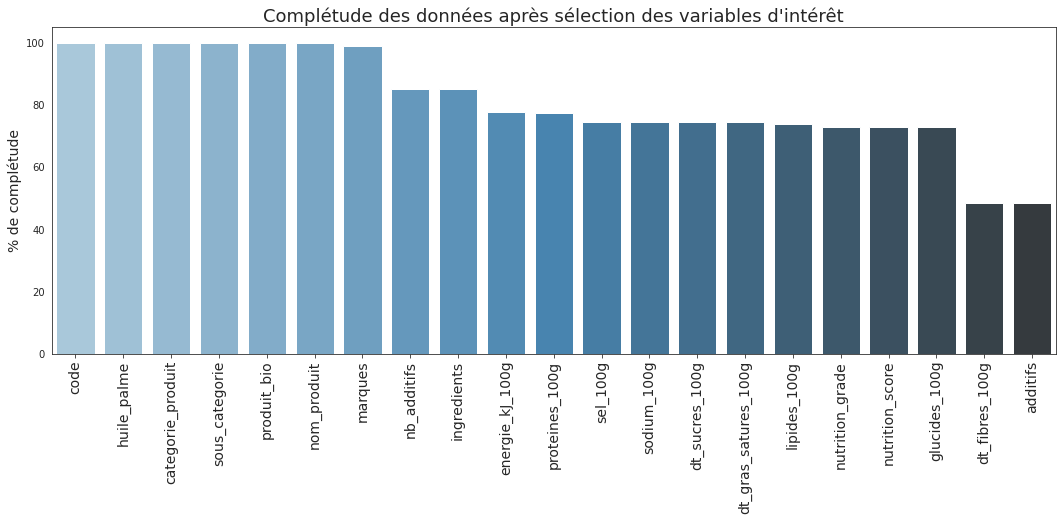

In [44]:
# Appel de la fonction de représentation graphique de la complétude de données
titre = ("Complétude des données après sélection des variables d'intérêt")

graphique_completude_donnees(df_fr, titre)

In [45]:
df_fr["nutrition_grade"].value_counts()

d    10807
c     8455
e     7622
a     7072
b     5519
Name: nutrition_grade, dtype: int64

**<center>Tableau de synthèse</center>**
<center>(en gras les données qui ont changées)</center>

| Indicateurs | Valeurs |
| :--- | :--- |
| Nb de lignes | 88.013 |
| Nb de colonnes | **21** |
| Nb données qualitatives | **10** |
| Nb données quantitatives | **11** |
| Données manquantes | **17 colonnes** |

------------------------------------------------------------------------------------------------------------------------

# <center><font color=green>Etape 3 - Nettoyage des données</font></center>

## **<font color=blue>3.1 - Traitement des valeurs aberrantes (outliers)</font>**

Nous allons faire :
- d'une part, un **nettoyage métier** qui consiste à éliminer les valeurs dont nous avons la connaissance de leur caractère erroné ; le DataFrame de sortie sera <code>**df_metier**</code> ;
- et d'autre part, un **nettoyage statistique** qui consiste à exclure les valeurs qui sont trop atypiques ; le DataFrame de sortie sera <code>**df_stat**</code> ;

Voyons quelques statitistiques de notre dataframe.

In [46]:
# Statistiques descriptives
df_fr.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
nutrition_score,39475.0,8.40,9.09,-15.0,1.00,8.00,15.00,40.0
energie_kJ_100g,41990.0,1093.38,793.54,0.0,394.00,1006.00,1642.00,18700.0
lipides_100g,39875.0,13.39,17.15,0.0,1.30,6.70,21.46,380.0
dt_gras_satures_100g,40175.0,5.38,8.34,0.0,0.30,1.90,7.50,210.0
glucides_100g,39460.0,27.57,27.42,0.0,4.00,14.00,53.30,190.0
dt_sucres_100g,40265.0,12.95,18.39,-0.1,1.00,4.00,16.50,105.0
dt_fibres_100g,26139.0,2.63,3.73,0.0,0.40,1.60,3.47,86.2
proteines_100g,41772.0,7.63,7.29,0.0,1.70,6.00,11.00,86.0
sel_100g,40317.0,0.89,2.02,0.0,0.07,0.55,1.20,211.0
sodium_100g,40315.0,0.35,0.79,0.0,0.03,0.22,0.47,83.0


Nous notons que :
- Les lipides, acides gras saturés, glucides, sucre et sel ont des valeurs > 100 ;
- Le sucre comprend une ou des valeurs < 0 ;
- La variable "énergie" dépasse largement la valeur maximale de 3.800kJ ;
- La somme des macronutriments atteint un maximum à 570 (vs 100 max) ;

Toutes ces entrées sont visiblement des erreurs que nous allons corriger dans le nettoyage métier.

### **<font color=brown>3.1.2 - Nettoyage métier</font>**

Lorsqu'on parle de la composition nutritionnelle des aliments, on fait évidemment référence aux substances qui les constituent et qui sont appelées <font color=orange>**nutriments**</font>. 

**<center><font color=orange>Règle 1 : La valeur des nutriments doit être supérieur ou égale à 0 et inférieur à 100.</font></center>**

D'autre part, selon <a>[wikipedia](https://fr.wikipedia.org/wiki/Valeur_%C3%A9nerg%C3%A9tique)</a> et <a>[la table Ciqual](https://ciqual.anses.fr/#/cms/questions-reponses/node/23)</a> de l'ANSES (*Agence nationale de sécurité sanitaire*), la **valeur énergétique** des **macronutriments** ne peuvent dépasser les **seuils** ci-dessous, **pour 100g de portion comestible** :

| Macronutriments | Energie maximale en kJ/100g |
| :--- | :---: |
| Lipides | 3.800 kJ |
| Protéines | 1.700 kJ |
| Glucides | 1.700 kJ |

**<center><font color=orange>Règle 2 : L'apport énergétique maximum pour un aliment est de 3.700kJ.</font></center>**

Appliquons ces 2 premières règles.

In [47]:
# Création d'un nouveau DataFrame pour appliquer le nettoyage métier
df_metier = df_fr.copy()

liste_100g = df_metier.columns[df_metier.columns.str.contains("100g")]

total_erreur=0

for item in liste_100g:
    if "energie" in item:
        erreurs = df_metier[~(df_metier[item].between(0.01, 3800) | df_metier[item].isnull())].index
        df_metier.drop(erreurs, inplace=True)
        total_erreur += erreurs.size
    else:
        erreurs = df_metier[~(df_metier[item].between(0,100) | df_metier[item].isnull())].index
        df_metier.drop(erreurs, inplace=True)

print(f"Il y a {total_erreur} erreurs les seuils de valeur nutritionnelle, soit {100*total_erreur/(df_metier.shape[0]+total_erreur):.2f}%")
print("Dimensions : ", df_metier.shape)

Il y a 143 erreurs les seuils de valeur nutritionnelle, soit 0.26%
Dimensions :  (53860, 21)


Les <font color=orange>**macronutriments**</font> - **lipides, glucides et protéines**, sont les nutriments contribuant à l'apport énergétique et dont la somme correspond à **100g (ou ml) de portion comestible**.

**<center><font color=orange>Règle 3 : La somme des macronutriments doit être inférieur ou égale à 100.</font></center>**

Nous allons créer une nouvelle variable <code>**somme_macro**</code> pour vérifier cette règle.

In [48]:
df_metier["somme_macro"] = df_metier["lipides_100g"] + df_metier["glucides_100g"] + df_metier["proteines_100g"]
erreurs = df_metier.loc[~(((df_metier["somme_macro"]).between(0.01, 101)) | 
                      ((df_metier["somme_macro"]).isnull()))].index
print(f"Il y a {erreurs.shape[0]} erreurs sur la somme des macronutriments, soit {100*erreurs.shape[0]/df_metier.shape[0]:.2f}%")
df_metier.drop(erreurs, inplace=True)
print("Dimensions : ", df_metier.shape)

Il y a 142 erreurs sur la somme des macronutriments, soit 0.26%
Dimensions :  (53718, 22)


De même, les **macronutriments** sont ce qu'on appelle des **nutriments parent** et sont constitués de **nutriments enfant**: les acides gras saturés font partie des lipides, tout comme le sucre fait partie des glucides. 

**<center><font color=orange>Règle 4 : La valeur des nutriments enfant doit être inférieure à celle des nutriments parent.</font></center>**

In [49]:
erreurs_gras = df_metier[((df_metier["lipides_100g"] < df_metier["dt_gras_satures_100g"]) & 
                         ~(df_metier["lipides_100g"].isnull()))].index
print(f"Il y a {erreurs_gras.shape[0]} erreurs liées aux lipides, soit {100*erreurs_gras.shape[0]/df_metier.shape[0]:.2f}%")

erreurs_sucre = df_metier[((df_metier["glucides_100g"] < df_metier["dt_sucres_100g"]) & 
                         ~(df_metier["glucides_100g"].isnull()))].index
print(f"Il y a {erreurs_sucre.shape[0]} erreurs liées aux glucides, soit {100*erreurs_sucre.shape[0]/df_metier.shape[0]:.2f}%")

nvl_erreurs = erreurs_gras.union(erreurs_sucre)
df_metier.drop(nvl_erreurs, inplace=True)
print("Dimensions : ", df_metier.shape)

Il y a 59 erreurs liées aux lipides, soit 0.11%
Il y a 80 erreurs liées aux glucides, soit 0.15%
Dimensions :  (53584, 22)


Enfin, le **sel alimentaire** est composé essentiellement de chlorure de **sodium**. Sa teneur en sodium est de 2,5 fois sa proportion. 

**<center><font color=orange>Règle 5 : La proportion de sel ne doit pas dépasser 2,5 fois celle du sodium.</font></center>**

In [50]:
erreurs_sel = df_metier[~(((df_metier["sel_100g"].isnull()) | (df_metier["sodium_100g"].isnull())) |
                        (((df_metier["sodium_100g"] >0) & ((df_metier["sel_100g"]/df_metier["sodium_100g"]).between(2.4, 2.6)))))].index
print(f"Il y a {erreurs_sel.shape[0]} erreurs liées au sel, soit {100*erreurs_sel.shape[0]/df_metier.shape[0]:.2f}%")
df_metier.drop(erreurs_sel, inplace=True)
print("Dimensions : ", df_metier.shape)

Il y a 3421 erreurs liées au sel, soit 6.38%
Dimensions :  (50163, 22)


In [51]:
df_metier.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
nutrition_score,35752.0,8.61,9.17,-15.00,1.00,8.00,16.00,40.0
energie_kJ_100g,38165.0,1102.20,742.00,0.42,435.00,1028.00,1653.00,3770.0
lipides_100g,36436.0,13.41,15.34,0.00,1.90,7.70,22.00,100.0
dt_gras_satures_100g,36406.0,5.58,8.08,0.00,0.40,2.20,8.00,93.0
glucides_100g,36021.0,27.45,27.01,0.00,4.00,14.40,53.00,100.0
dt_sucres_100g,36488.0,12.50,17.50,0.00,1.00,3.80,16.90,100.0
dt_fibres_100g,23472.0,2.71,3.74,0.00,0.50,1.80,3.50,86.2
proteines_100g,37956.0,8.13,7.26,0.00,2.80,6.40,11.30,72.0
sel_100g,36490.0,0.98,1.77,0.00,0.11,0.68,1.30,76.2
sodium_100g,36488.0,0.38,0.70,0.00,0.04,0.27,0.51,30.0


**Comparaison des données avant et après nettoyage metier**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


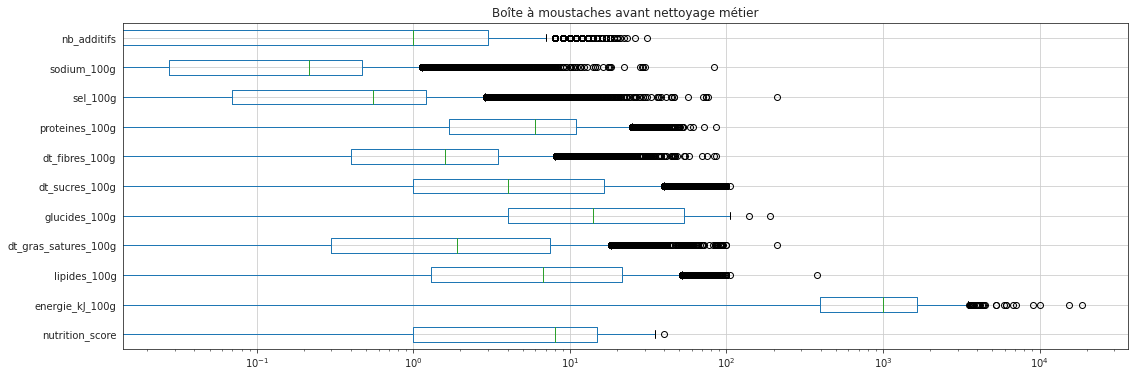

In [52]:
# Boîte à moustaches pour visualiser les quartiles et outliers
fig, axs = plt.subplots(figsize=(18, 6))
fig = df_fr.select_dtypes(include="number").boxplot(vert=False)
axs.set_xscale("log")
plt.title("Boîte à moustaches avant nettoyage métier")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


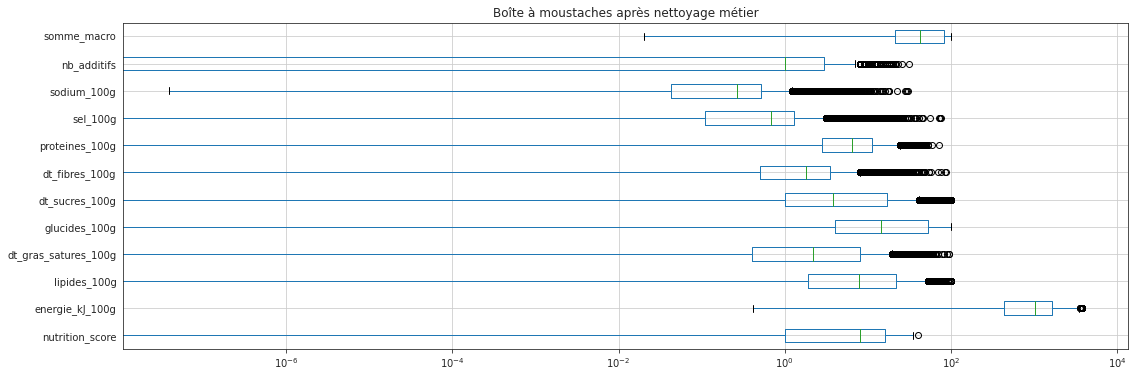

In [53]:
# Boîte à moustaches pour visualiser les quartiles et outliers
fig, axs = plt.subplots(figsize=(18, 6))
fig = df_metier.select_dtypes(include="number").boxplot(vert=False)
axs.set_xscale("log")
plt.title("Boîte à moustaches après nettoyage métier")
plt.show()

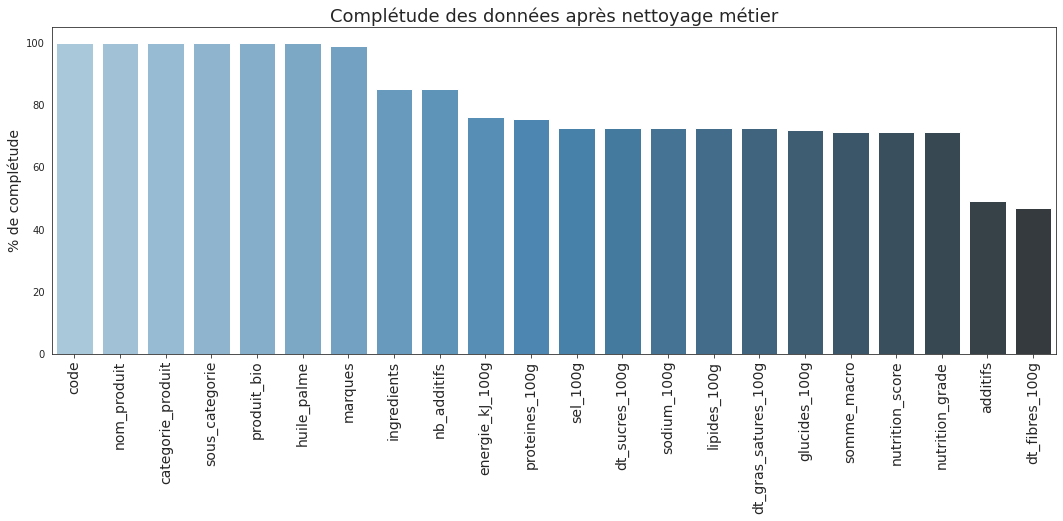

In [54]:
# Appel de la fonction de représentation graphique de la complétude de données
titre = ("Complétude des données après nettoyage métier")

graphique_completude_donnees(df_metier, titre)

In [55]:
df_metier["nutrition_grade"].value_counts()

d    9861
c    7620
e    6897
a    6297
b    5077
Name: nutrition_grade, dtype: int64

### **<font color=brown>3.1.3 - Nettoyage statistique</font>**
Nous utilisons l'**écart interquatile** afin de juger si les valeurs atypiques doivent être exclues. 

**Nous appliquerons ce correctif additionnel uniquement aux variables nutritionnelles.**

**NOTE** : Nous supprimons la variable <code>somme_macro</code> qui ne nous est plus utile.

In [56]:
# Copie du DataFrame métier pour appliquer le nettoyage statistique
df_iqr = df_metier.copy()

# Suppression de cette variable qui ne nous est plus utile
df_iqr = df_iqr.drop(["somme_macro"], axis=1)

nutriments = ["lipides_100g", "dt_gras_satures_100g", "glucides_100g", "dt_sucres_100g",
       "dt_fibres_100g", "proteines_100g", "sel_100g", "sodium_100g"]

# Calcul de l"écart-interquartile pour appliquer le nettoyage statistique
for var in nutriments:
    IQR = round(df_iqr[var].quantile(0.75) - df_iqr[var].quantile(0.25), 1)
    limite_haute = round(df_iqr[var].quantile(0.75) +(1.5 * IQR),1)
    df_iqr = df_iqr.loc[(df_iqr[var].isnull()) | (df_iqr[var] <=limite_haute)]

# Affichage de la dimension du dataframe
print("Le DataFrame HORS OUTLIERS a " + str(df_iqr.shape[0]) + " lignes ( "
     + str(round(len(df_iqr)/len(original)*100,1)) + " % du DataFrame original.)")

Le DataFrame HORS OUTLIERS a 40301 lignes ( 12.6 % du DataFrame original.)


In [57]:
df_iqr.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
nutrition_score,26396.0,6.10,8.17,-14.00,0.00,4.00,13.00,35.00
energie_kJ_100g,28399.0,897.86,657.97,0.42,335.00,710.00,1473.50,3770.00
lipides_100g,27161.0,9.53,10.22,0.00,1.50,5.40,15.00,52.10
dt_gras_satures_100g,26802.0,3.42,4.31,0.00,0.30,1.60,4.60,17.90
glucides_100g,26836.0,24.96,25.32,0.00,4.70,13.20,48.00,100.00
dt_sucres_100g,26851.0,8.06,9.79,0.00,1.12,3.50,11.50,38.20
dt_fibres_100g,18061.0,2.08,1.89,0.00,0.50,1.70,3.03,8.00
proteines_100g,28219.0,7.17,5.88,0.00,2.50,6.10,10.30,24.30
sel_100g,26919.0,0.77,0.66,0.00,0.12,0.70,1.20,2.79
sodium_100g,26917.0,0.30,0.26,0.00,0.05,0.28,0.47,1.10


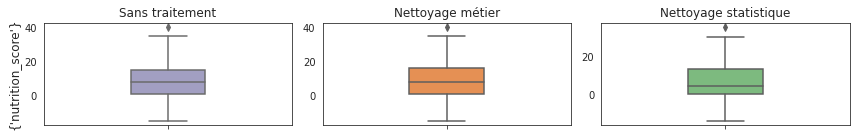

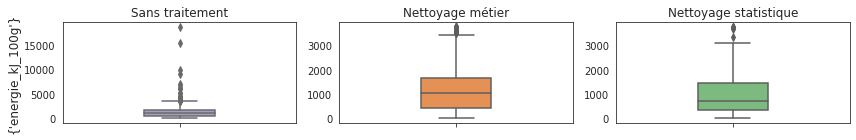

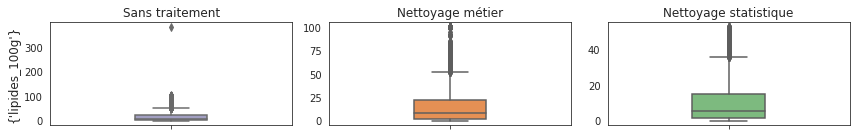

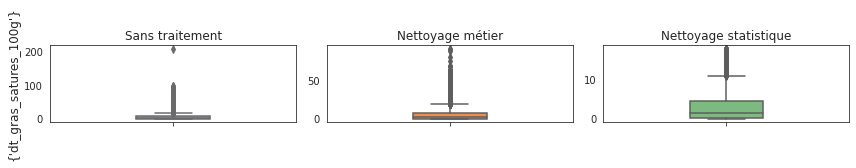

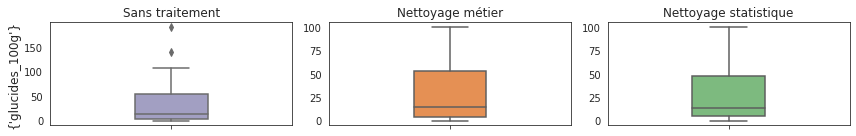

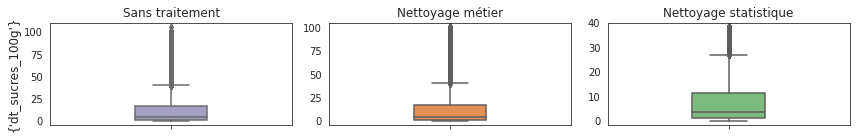

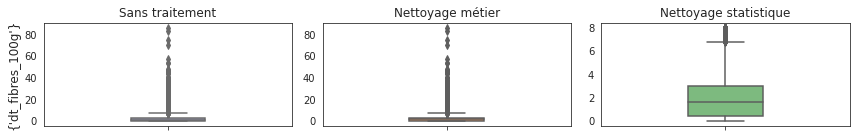

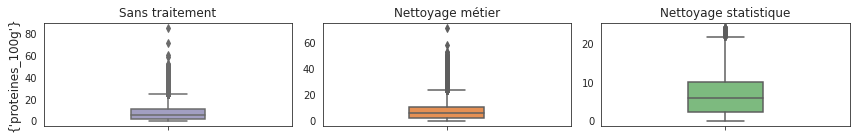

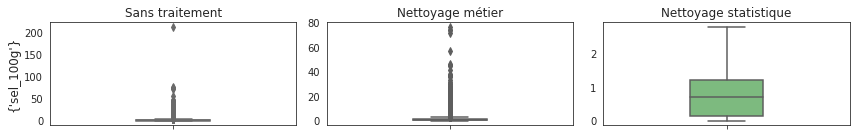

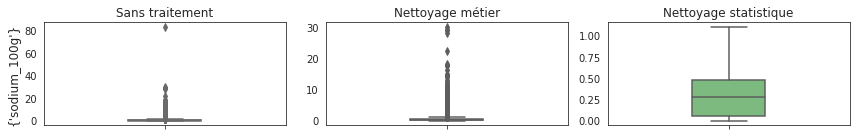

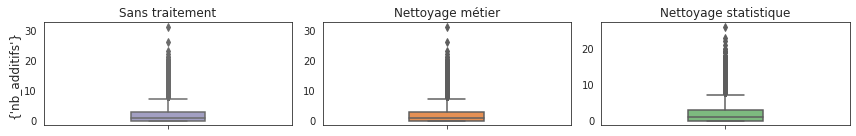

In [58]:
# Représentation graphique : boxplot de comparaison sur les 3 DataFrames
for var in df_iqr.select_dtypes(include="number"):
    fig = plt.figure(figsize=(12,2))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    sns.boxplot(y=df_fr[var], ax=ax1, palette="Purples", width=0.3)
    ax1.set_title("Sans traitement", fontsize=12)
    ax1.set_ylabel({var}, fontsize=12)
    sns.boxplot(y=df_metier[var], ax=ax2, palette="Oranges", width=0.3)
    ax2.set_title("Nettoyage métier", fontsize=12)
    ax2.set_ylabel("")
    sns.boxplot(y=df_iqr[var], ax=ax3, palette="Greens", width=0.3)
    ax3.set_title("Nettoyage statistique", fontsize=12)
    ax3.set_ylabel("")
    plt.tight_layout()
    plt.show()

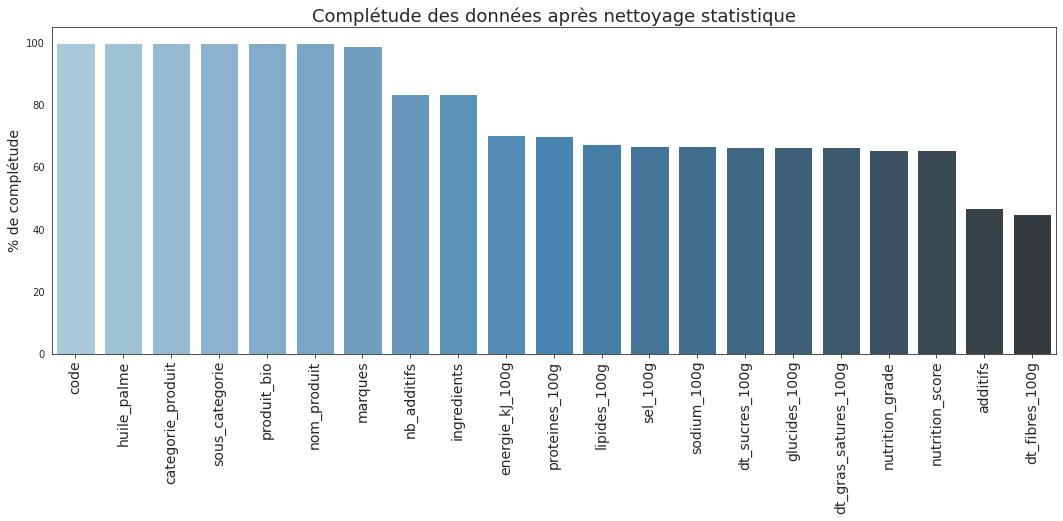

In [59]:
# Appel de la fonction de représentation graphique de la complétude de données
titre = ("Complétude des données après nettoyage statistique")

graphique_completude_donnees(df_iqr, titre)

Nous avons fini le nettoyage de nos données de ses valeurs aberrantes.

Nous allons maintenant traiter les valeurs manquantes.

## **<font color=blue>3.2 - Traitement des valeurs manquantes</font>**

Nous allons créer un **dataframe final - nettoyé**, que nous appellerons : <code>**df_clean**</code>

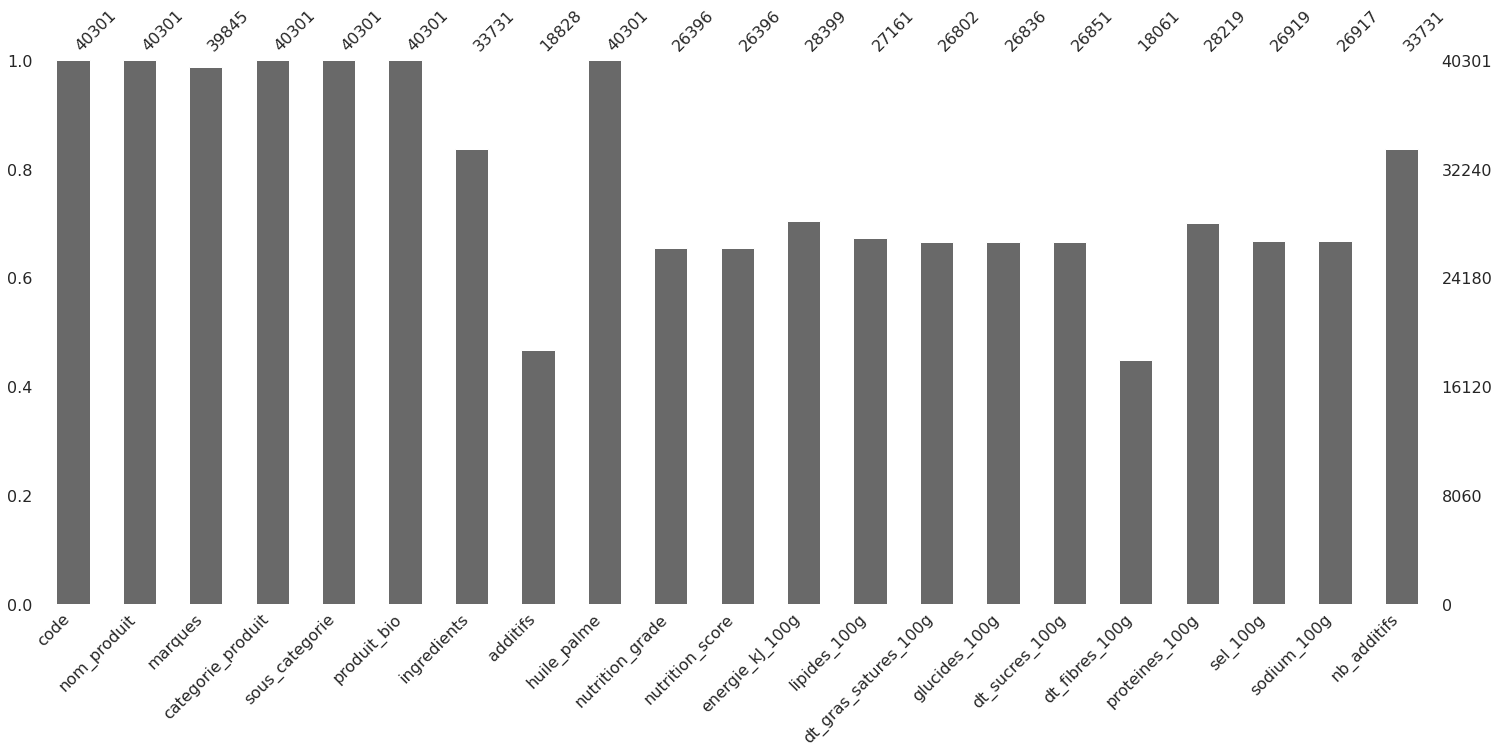

In [60]:
# Création du DataFrame nettoyé
df_clean = df_iqr.copy()

# Variables ré-ordonnées
df_clean = df_clean.reindex(columns = ["code", "nom_produit", "marques", 
                                       "categorie_produit", "sous_categorie", "produit_bio", 
                                       "ingredients", "additifs", "huile_palme", 
                                       "nutrition_grade", "nutrition_score", 
                                       "energie_kJ_100g", "lipides_100g", "dt_gras_satures_100g", 
                                       "glucides_100g", "dt_sucres_100g", "dt_fibres_100g", 
                                       "proteines_100g", "sel_100g", "sodium_100g", "nb_additifs"])

# Visualisation du nombre de données manquantes par colonne avec la librairie missingno
msno.bar(df_clean)

In [61]:
# Résumé des données d'un dataframe
def summary_count_unique_missing_zero_dtype(dff):
        # Valeurs calculées pour chaque colonne
        nb_unique = dff.nunique(dropna=False) # Nb Valeurs uniques, y compris les valeurs manquantes
        nb_non_nulle = dff.count(axis=0) # Nb de valeurs Non-nulles
        nb_manquant = dff.isnull().sum() # Nb de valeurs manquantes
        nb_manquant_pourcent = 100 * dff.isnull().sum() / len(dff) # % de valeurs manquantes
        nb_zero = (dff == 0.00).astype(int).sum(axis=0) # Nb de valeurs à zéro
        nb_zero_pourcent = 100 *((dff == 0.00).astype(int).sum(axis=0)) / len(dff)
        # Création d'une table de donnée ayant pour colonne les valeurs calculées
        table_synthese = pd.concat([nb_unique, nb_non_nulle, nb_manquant, nb_manquant_pourcent, nb_zero, \
                              nb_zero_pourcent], axis=1)
        # Libellés explicites pour chaque colonne
        table_synthese = table_synthese.rename(
        columns = {0 : "Valeurs uniques", 1 : "Valeurs non-nulles", 2 : "Valeurs manquantes", \
                   3 : "% Manquants vs Total", 4 : "Valeurs à zéro", 5 : "% Zéro vs Total"})
        # Ajout de la colonne de type de données à la table de données
        table_synthese['Type Données'] = dff.dtypes
        # Création d'un filtre sur les valeurs manquantes
        filtre_manquant = table_synthese[table_synthese["Valeurs manquantes"] != 0]
        # Tri décroissant sur la colonne "Valeurs manquantes"
        table_synthese = table_synthese[
            table_synthese.iloc[:,0] != 0].sort_values("% Manquants vs Total", ascending=False).round(1)
        # Afficher le nombre de colonnes et de lignes au total et le nombre de colonnes avec vlr manquantes
        print ("NB : Il y a " + str(filtre_manquant.shape[0]) + " colonnes ayant des valeurs manquantes.")
        return table_synthese

# Appel de la fonction
summary_count_unique_missing_zero_dtype(df_clean.select_dtypes(exclude="number"))

NB : Il y a 4 colonnes ayant des valeurs manquantes.


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Manquants vs Total,Valeurs à zéro,% Zéro vs Total,Type Données
additifs,8198,18828,21473,53.3,0,0.0,object
nutrition_grade,6,26396,13905,34.5,0,0.0,object
ingredients,31187,33731,6570,16.3,0,0.0,object
marques,8574,39845,456,1.1,0,0.0,object
code,40301,40301,0,0.0,0,0.0,object
nom_produit,34623,40301,0,0.0,0,0.0,object
categorie_produit,9,40301,0,0.0,0,0.0,object
sous_categorie,34,40301,0,0.0,0,0.0,object
produit_bio,2,40301,0,0.0,0,0.0,object
huile_palme,5,40301,0,0.0,0,0.0,object


In [62]:
df_clean.describe(exclude="number").transpose().round()

,count,unique,top,freq
code,40301,40301,3021690006049,1
nom_produit,40301,34623,Lait demi-écrémé,27
marques,39845,8573,Carrefour,2113
categorie_produit,40301,9,Boissons,6157
sous_categorie,40301,34,Aliments préparés,4657
produit_bio,40301,2,Non spécifié,35111
ingredients,33731,31186,Semoule de _blé_ dur de qualité supérieure.,79
additifs,18828,8197,E330 - Acide citrique,751
huile_palme,40301,5,Sans palme,28035
nutrition_grade,26396,5,c,6671


<font color=orange>**1) Remplissage des valeurs qualitatives manquantes par "Non spécifié" (hors nutrition-grade)**</font>

En effet, <code>**code, nom_produit**</code> sont des variables entièrement renseignées car les lignes sans valeurs ou dupliquées ont été supprimées. 

<code>**nom_produit, huile_palme**</code> sont des variables créées ou transformées, donc déjà entièrement renseignées.

Quant à <code>**nutrition_grade**</code>, nous appliquerons une condition en fonction de <code>**nutrition_score**</code>.

In [63]:
quali_a_remplir = ["marques", "categorie_produit", "sous_categorie", "ingredients", "additifs"]

for var in quali_a_remplir:
    missing = df_clean[var].isnull().sum()
    print("Le nombre de valeurs manquantes pour {0} est : {1}".format(var, missing))
    df_clean[var].fillna("Non spécifié", inplace=True)

# Appel de la fonction comptage valeurs manquantes
summary_count_unique_missing_zero_dtype(df_clean.select_dtypes(exclude="number"))

Le nombre de valeurs manquantes pour marques est : 456
Le nombre de valeurs manquantes pour categorie_produit est : 0
Le nombre de valeurs manquantes pour sous_categorie est : 0
Le nombre de valeurs manquantes pour ingredients est : 6570
Le nombre de valeurs manquantes pour additifs est : 21473
NB : Il y a 1 colonnes ayant des valeurs manquantes.


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Manquants vs Total,Valeurs à zéro,% Zéro vs Total,Type Données
nutrition_grade,6,26396,13905,34.5,0,0.0,object
code,40301,40301,0,0.0,0,0.0,object
nom_produit,34623,40301,0,0.0,0,0.0,object
marques,8574,40301,0,0.0,0,0.0,object
categorie_produit,9,40301,0,0.0,0,0.0,object
sous_categorie,34,40301,0,0.0,0,0.0,object
produit_bio,2,40301,0,0.0,0,0.0,object
ingredients,31187,40301,0,0.0,0,0.0,object
additifs,8198,40301,0,0.0,0,0.0,object
huile_palme,5,40301,0,0.0,0,0.0,object


<font color=orange>**2) Nutriments : Remplissage des valeurs manquantes par la MEDIANE par sous-catégories de produit et marques**</font>

En effet, comme nous pouvons le voir ci-dessous :
- les distributions de nos variables ne sont pas normales, elles sont plutôt étalées vers la droite (cf. skewness > 0) et certaines distributions sont bi-voire plurimodales ;
- la moyenne est supérieure à la médiane.

La **médiane** est donc ici la meilleure mesure de tendance centrale avec ces distributions désaxées.

De plus , nous appliquons un **remplissage des valeurs manquantes par sous-catégorie et marque pour bénéficier d'une granularité plus fine** que la médiane seule de chaque colonne.

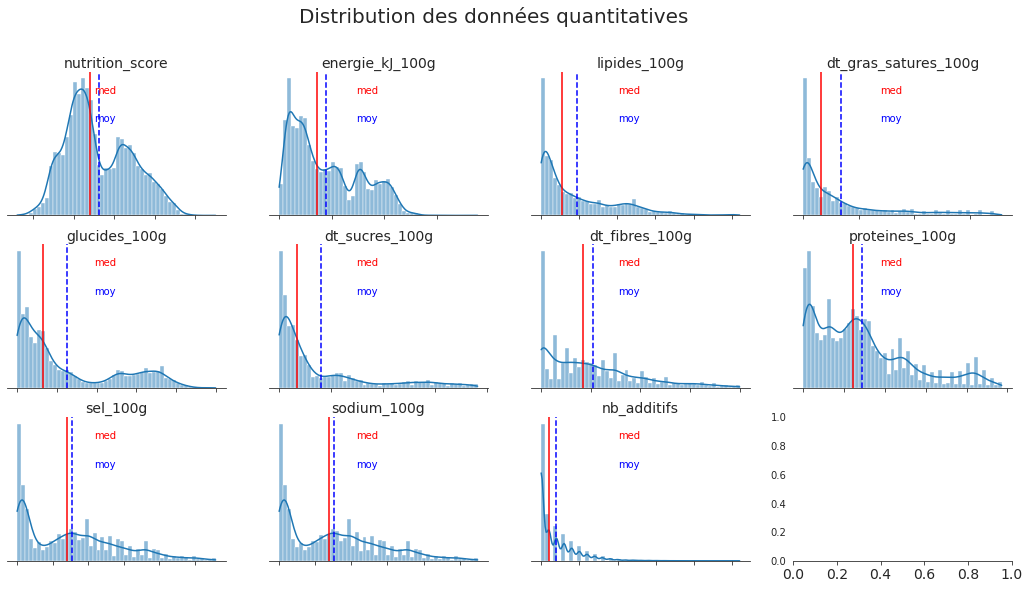

In [64]:
# Représentation graphique
# https://matplotlib.org/3.1.1/gallery/pyplots/text_layout.html#sphx-glr-gallery-pyplots-text-layout-py
gauche, largeur = .25, .5
bas_page, hauteur = .25, .5
droite = gauche + largeur
haut_page = bas_page + hauteur

fig, axs = plt.subplots(3,4, figsize=(18,9))

for var, axs in zip(df_clean.select_dtypes(include="number"), axs.flat):
    sns.despine(fig, left=True)
    sns.histplot(x=var, data=df_clean, bins=50, ax=axs, kde=True)
    axs.xaxis.set_label_position("top")
    axs.set_xlabel(var, fontsize=14)
    axs.set_ylabel("")
    axs.set_xticklabels("")
    axs.set_yticklabels("")
    axs.axvline(df_clean[var].median(), color="r", ls="-")
    axs.text((gauche+.15), (bas_page+.6), "med", color="r", transform=axs.transAxes)
    axs.axvline(df_clean[var].mean(), color="b", ls="--")
    axs.text((gauche+.15), (bas_page+.4), "moy", color="b", transform=axs.transAxes)
    plt.xticks(fontsize=14)

plt.suptitle("Distribution des données quantitatives", fontsize=20)
# plt.tight_layout()
plt.show()

In [65]:
df_clean.skew()

code                    200.751090
nutrition_score           0.408279
energie_kJ_100g           0.605714
lipides_100g              1.289211
dt_gras_satures_100g      1.578328
glucides_100g             0.893055
dt_sucres_100g            1.475965
dt_fibres_100g            0.969985
proteines_100g            0.929917
sel_100g                  0.692330
sodium_100g               0.692259
nb_additifs               1.921303
dtype: float64

In [66]:
# Création d'une liste de variables pour lesquelles nous avons la connaissance métier
nutriments_score = ["lipides_100g", "dt_gras_satures_100g", "glucides_100g", "dt_sucres_100g", 
                    "dt_fibres_100g", "proteines_100g", "sel_100g", "sodium_100g", "nutrition_score"]

# DONNEES NUTRITIONNELLES : Remplissage des valeurs manquantes par la médiane
for var in nutriments_score:
    df_clean[var] = df_clean.groupby(["categorie_produit", 
                                      "sous_categorie"])[var].transform(lambda grp: grp.fillna(grp.median()))
    
# Appel de la fonction
summary_count_unique_missing_zero_dtype(df_clean.select_dtypes(include="number"))

NB : Il y a 2 colonnes ayant des valeurs manquantes.


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Manquants vs Total,Valeurs à zéro,% Zéro vs Total,Type Données
energie_kJ_100g,2644,28399,11902,29.5,0,0.0,float64
nb_additifs,26,33731,6570,16.3,14903,37.0,float64
nutrition_score,46,40301,0,0.0,1760,4.4,float64
lipides_100g,783,40301,0,0.0,3372,8.4,float64
dt_gras_satures_100g,646,40301,0,0.0,4957,12.3,float64
glucides_100g,1166,40301,0,0.0,583,1.4,float64
dt_sucres_100g,718,40301,0,0.0,1112,2.8,float64
dt_fibres_100g,349,40301,0,0.0,9070,22.5,float64
proteines_100g,625,40301,0,0.0,865,2.1,float64
sel_100g,1415,40301,0,0.0,1,0.0,float64


<font color=orange>**3) Energie : Remplissage des valeurs manquantes par calcul avec les macronutriments**</font>

Maintenant que tous les macronutriments ont leurs valeurs renseignées, nous allons pouvoir compléter la variable **Energie**.

Dans un 1er temps, nous allons transformer les **valeurs à zéro** en **NaN**.

Puis nous allons remplacer les **NaN** par la **valeur énergétique = 37 * lipides + 17 * (glucides + protéines)**.

In [67]:
# ENERGIE : Remplissage par le calcul de l'énergie
df_clean["energie_kJ_100g"] = df_clean["energie_kJ_100g"].replace(0, np.nan)
df_clean["energie_kJ_100g"].fillna((df_clean["lipides_100g"] * 37) + 
                                      ((df_clean["glucides_100g"] + df_clean["proteines_100g"]) * 17), 
                                      inplace=True)

# Appel de la fonction
summary_count_unique_missing_zero_dtype(df_clean.select_dtypes(include="number"))

NB : Il y a 1 colonnes ayant des valeurs manquantes.


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Manquants vs Total,Valeurs à zéro,% Zéro vs Total,Type Données
nb_additifs,26,33731,6570,16.3,14903,37.0,float64
nutrition_score,46,40301,0,0.0,1760,4.4,float64
energie_kJ_100g,2750,40301,0,0.0,0,0.0,float64
lipides_100g,783,40301,0,0.0,3372,8.4,float64
dt_gras_satures_100g,646,40301,0,0.0,4957,12.3,float64
glucides_100g,1166,40301,0,0.0,583,1.4,float64
dt_sucres_100g,718,40301,0,0.0,1112,2.8,float64
dt_fibres_100g,349,40301,0,0.0,9070,22.5,float64
proteines_100g,625,40301,0,0.0,865,2.1,float64
sel_100g,1415,40301,0,0.0,1,0.0,float64


<font color=orange>**4) Nombre d'additifs : Remplissage des valeurs manquantes avec *-1***</font>

Enfin, nous voudrions distinguer ces valeurs manquantes des valeurs à zéro.

In [68]:
# POUR LES AUTRES DONNES QUANTITATIVES 
df_clean["nb_additifs"].fillna(-1, inplace=True)

# Appel de la fonction
summary_count_unique_missing_zero_dtype(df_clean.select_dtypes(include="number"))

NB : Il y a 0 colonnes ayant des valeurs manquantes.


,Valeurs uniques,Valeurs non-nulles,Valeurs manquantes,% Manquants vs Total,Valeurs à zéro,% Zéro vs Total,Type Données
nutrition_score,46,40301,0,0.0,1760,4.4,float64
energie_kJ_100g,2750,40301,0,0.0,0,0.0,float64
lipides_100g,783,40301,0,0.0,3372,8.4,float64
dt_gras_satures_100g,646,40301,0,0.0,4957,12.3,float64
glucides_100g,1166,40301,0,0.0,583,1.4,float64
dt_sucres_100g,718,40301,0,0.0,1112,2.8,float64
dt_fibres_100g,349,40301,0,0.0,9070,22.5,float64
proteines_100g,625,40301,0,0.0,865,2.1,float64
sel_100g,1415,40301,0,0.0,1,0.0,float64
sodium_100g,1377,40301,0,0.0,0,0.0,float64


<font color=orange>**5) Nutrition-grade : Remplissage des valeurs manquantes avec application de condition sur <code>nutrition_score</code>**</font>

Nous allons appliquer la règle la plus simple possible comme décrite par l'image ci-dessous.

![nutriScoreGrade.jpg](attachment:nutriScoreGrade.jpg)

In [69]:
# NUTRITION GRADE : Remplissage des valeurs manquantes sur la base des valeurs de NUTRITION SCORE
def test(rows):
    if pd.isnull(rows["nutrition_grade"]):
        if (rows["nutrition_score"] <=-4):
            return "a"
        elif ((rows["nutrition_score"] >-4) & (rows["nutrition_score"] <=2)):
            return "b"
        elif ((rows["nutrition_score"] >2) & (rows["nutrition_score"] <=10)):
            return "c"
        elif ((rows["nutrition_score"] >10) & (rows["nutrition_score"] <=18)):
            return "d"
        else: 
            return "e"
    else:
        return rows["nutrition_grade"]

# Appel de la fonction
df_clean["nutrition_grade"] = df_clean.apply(test, axis=1)

# Vérification des données de nutrition score sur les 3 df nettoyés
a = df_metier["nutrition_grade"].value_counts(dropna=False)
b = df_iqr["nutrition_grade"].value_counts(dropna=False)
c = df_clean["nutrition_grade"].value_counts(dropna=False)
df_compare = pd.concat([a, b, c], axis=1)
df_compare.head(6)

,nutrition_grade,nutrition_grade,nutrition_grade
NaN,14411,13905,NaN
d,9861,6000,8732.0
c,7620,6671,13654.0
e,6897,3133,3744.0
a,6297,5770,7010.0
b,5077,4822,7161.0


In [70]:
df_clean.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
nutrition_score,40301.0,6.01,7.51,-14.00,1.00,4.00,12.00,35.00
energie_kJ_100g,40301.0,814.98,649.89,0.42,266.10,602.10,1247.00,3770.00
lipides_100g,40301.0,8.53,10.10,0.00,0.50,4.40,12.70,52.10
dt_gras_satures_100g,40301.0,3.12,4.23,0.00,0.20,1.20,3.80,17.90
glucides_100g,40301.0,22.13,24.37,0.00,3.50,11.00,39.00,100.00
dt_sucres_100g,40301.0,7.44,9.23,0.00,1.00,3.40,10.60,38.20
dt_fibres_100g,40301.0,1.57,1.64,0.00,0.10,1.30,2.40,8.00
proteines_100g,40301.0,6.63,6.09,0.00,1.30,5.60,10.00,24.30
sel_100g,40301.0,0.71,0.65,0.00,0.09,0.60,1.20,2.79
sodium_100g,40301.0,0.28,0.25,0.00,0.04,0.24,0.47,1.10


**Petit contrôle sur la valeur max des glucides (100)** : c'est de la cassonade dont une valeur atypique mais pas aberrante !

In [71]:
df_metier.loc[df_metier["glucides_100g"].idxmax(), 
              ["nom_produit", "marques","categorie_produit", "sous_categorie", "energie_kJ_100g", "lipides_100g", 
               "glucides_100g", "proteines_100g"]]

nom_produit              cassonade
marques                    Erstein
categorie_produit    Snacks sucrés
sous_categorie          Confiserie
energie_kJ_100g               1674
lipides_100g                     0
glucides_100g                  100
proteines_100g                   0
Name: 146335, dtype: object

In [72]:
# Appel de la fonction
synthese_generale(df_clean, 0.1)

Le DataFrame a 40301 lignes et 21 colonnes,
soit 13% des données du DataFrame original.

Il y a 0 colonnes ayant des valeurs manquantes,
dont 0 colonnes avec 10% de données manquantes.

Les types de données :
 float64    11
object     10
dtype: int64


**<center>Tableau de synthèse</center>**
<center>(en gras les données qui ont changées)</center>

| Indicateurs | Valeurs |
| :--- | :--- |
| Nb de lignes | **40.301** |
| % vs Original | **13%** |
| Nb de colonnes | 21 |
| Nb données qualitatives | 10 |
| Nb données quantitatives | 11 |
| Données manquantes | **0** |

------------------------------------------------------------------------------------------------------------------------

# <center><font color=green>Etape 4 - Transformation des variables pour l'exploration de données</font></center>

## **<center><font color=blue>Création de variables de scoring des produits</font></center>**

L'idée - pour moi ici est, de créer de nouvelles variables afin de pouvoir **comparer principalement des marques entre elles** mais également, des produits similaires si on va vraiment dans le détail.

On construit donc des variables qui donnent une note de 1 à 5 : **1 pour le moins bon, 5 pour le mieux**.

Par exemple : 
- pour un produit BIO : 1 = Non spécifié/Non Bio, 5 = Bio.
- à contrario pour l'huile de palme : 
    - 1= avec palme et dérivés, ... 
    - 3 = Non spécifié (car on ne sait pas si c'est une bonne chose ou non) , ...,
    - 5=Sans palme.

Nous allons appliquer un scoring :
- **aux variables nutritionnelles** utilisées pour calculer le nutri-score ;
- à l'**énergie** ;
- aux produits **bio** ;
- aux produits en lien avec l'**huile de palme** ;
- aux produits en lien avec des **additifs (SANS notion de NOCIVITE**, juste leurs nombres) ;
- et avec le **nutrition grade** qui est déjà un scoring en soi.

Pour les variables nutritionnelles, j'ai utilisé le document **"Règlement d'usage du logo "Nutri-score" de Santé publique France - Version 21 du 16 juin 2020**, disponible [**ICI**](https://www.santepubliquefrance.fr/content/download/150257/file/20200616RUV21_FR.pdf) mais je me suis également inspiré du notebook très intéressant de [**François Boyer sur Kaggle**](https://www.kaggle.com/franoisboyer/fropenfoodfacts-2020-data-clean-and-engineering).


In [73]:
df_scoring = df_clean.copy()

## Scoring des éléments nutritionnels
intervalle_variable_scoring = {"energie_kJ_100g" : {"bins" : [-np.inf, 335, 1005, 1675, 2345, np.inf],
                                                    "labels" : [5, 4, 3, 2, 1]},
                               "dt_gras_satures_100g" : {"bins" : [-np.inf, 1, 3, 5, 7, np.inf],
                                                         "labels" : [5, 4, 3, 2, 1]},
                               "dt_sucres_100g" : {"bins" : [-np.inf, 4.5, 13.5, 22.5, 31, np.inf],
                                                   "labels" : [5, 4, 3, 2, 1]},
                               "sel_100g" : {"bins" : [-np.inf, 0.225, 0.675, 1.125, 1.575, np.inf],
                                             "labels" : [5, 4, 3, 2, 1]},
                               "proteines_100g" : {"bins" : [-np.inf, 3.2, 4.8, 6.4, 8, np.inf],
                                                         "labels" : [1, 2, 3, 4, 5]},
                               "dt_fibres_100g" : {"bins" : [-np.inf, 1.9, 2.8, 3.7, 4.7, np.inf],
                                                         "labels" : [1, 2, 3, 4, 5]}}

for nom_variable in intervalle_variable_scoring.keys():
    nom_variable_scoring = nom_variable + "_scoring"
    
    df_scoring[nom_variable_scoring] = pd.cut(df_scoring[nom_variable], 
                                            bins=intervalle_variable_scoring[nom_variable]["bins"], 
                                            labels=intervalle_variable_scoring[nom_variable]["labels"])

    
## Scoring du nutri-grade
def conversion_category_to_number(cat):
    cat_table = {"a":5, "b":4, "c":3, "d":2, "e":1, "nan": None}
    return(cat_table.get(cat, None))

resultat = pd.DataFrame(df_scoring["nutrition_grade"].apply(conversion_category_to_number))
df_scoring["nutrition_scoring"] = resultat


## Scoring des produits bio
df_scoring["bio_scoring"] = ""
df_scoring.loc[df_scoring["produit_bio"]=="Bio", "bio_scoring"] = 5
df_scoring.loc[df_scoring["produit_bio"]!="Bio", "bio_scoring"] = 1


## Scoring huile de palme
df_scoring["palme_scoring"] = ""
df_scoring.loc[df_scoring["huile_palme"]=="Sans palme", "palme_scoring"] = 5
df_scoring.loc[df_scoring["huile_palme"]=="Dérivés possibles", "palme_scoring"] = 4
df_scoring.loc[df_scoring["huile_palme"]=="Non spécifié", "palme_scoring"] = 3
df_scoring.loc[df_scoring["huile_palme"]=="Avec palme", "palme_scoring"] = 2
df_scoring.loc[df_scoring["huile_palme"]=="Avec palme et dérivés", "palme_scoring"] = 1


## Scoring des additifs
df_scoring["additifs_scoring"] = ""
df_scoring.loc[(df_scoring["nb_additifs"]==0), "additifs_scoring"] = 5
df_scoring.loc[(df_scoring["nb_additifs"].between(1,5)), "additifs_scoring"] = 4
df_scoring.loc[(df_scoring["nb_additifs"]==-1), "additifs_scoring"] = 3
df_scoring.loc[(df_scoring["nb_additifs"].between(6,10)), "additifs_scoring"] = 2
df_scoring.loc[(df_scoring["nb_additifs"]>10), "additifs_scoring"] = 1


# Convertir toutes les variables scoring en variables numériques
liste_scoring = df_scoring.columns[df_scoring.columns.str.contains("_scoring")] 
for i in liste_scoring:
    df_scoring[i] = df_scoring[i].astype("float64")

# Affichage des infos du nouveau dataframe
# df_scoring.info()
# df_scoring.columns
df_scoring[liste_scoring].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40301 entries, 182 to 320765
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   energie_kJ_100g_scoring       40301 non-null  float64
 1   dt_gras_satures_100g_scoring  40301 non-null  float64
 2   dt_sucres_100g_scoring        40301 non-null  float64
 3   sel_100g_scoring              40301 non-null  float64
 4   proteines_100g_scoring        40301 non-null  float64
 5   dt_fibres_100g_scoring        40301 non-null  float64
 6   nutrition_scoring             40301 non-null  float64
 7   bio_scoring                   40301 non-null  float64
 8   palme_scoring                 40301 non-null  float64
 9   additifs_scoring              40301 non-null  float64
dtypes: float64(10)
memory usage: 3.4 MB


In [74]:
# Appel de la fonction
synthese_generale(df_scoring, 0.1)

Le DataFrame a 40301 lignes et 31 colonnes,
soit 13% des données du DataFrame original.

Il y a 0 colonnes ayant des valeurs manquantes,
dont 0 colonnes avec 10% de données manquantes.

Les types de données :
 float64    21
object     10
dtype: int64


**<center>Tableau de synthèse</center>**
<center>(en gras les données qui ont changées)</center>

| Indicateurs | Valeurs |
| :--- | :--- |
| Nb de lignes | 40.301 |
| % vs Original | 13% |
| Nb de colonnes | **31** |
| Nb données qualitatives | 10 |
| Nb données quantitatives | **21** |
| Données manquantes | 0 |

In [75]:
df_scoring.to_csv(src_path / "off_cleaned.csv", index=False)